
**_______________________________________________________________________________________________________________**

# Content


* 1. Import Libraries
    * 1.1 Import File
    * 1.2 Import File
    * 1.3 Merge Files
    
    
* 2. Data Security 
    * 2.1 Set Visualizatioin Settings


* 3. Regional Segmentation
    * Spending Habit between Regions
    * 3.1 Create Region Flags
    * 3.2 Create Subset Representing Population
    * 3.3 Calculating Distribution of Frequent Customers
        * 3.3.1 Usage Calculation
        * 3.3.2 Calculatioin Ratio of Order from Frequent Customers
        * 3.3.3 Visualization
        
    * 3.4 Spending Habit across Regions
        * 3.4.1 Visualization: High Spender
        * 3.4.2 Visualization: Low Spender
        * 3.4.3 Ration of High and Low Spenders
            * 3.4.3.1 Calculation of Ratios
            * 3.4.3.2 Visualization: Spending Habit across Regions
            
    * 3.5 Revenue by Regions
        * 3.5.1 Visualization
        
    * 3.6 Customer Loyalty across Region
        * 3.6.1 Ratio of Loyal Customer
        * 3.6.2 Visualization
        * 3.6.3 Order Frequency of Loyal Customers
        * 3.6.4 Ratio of Order placed by Loyal Customers
        * 3.6.5 Frequency among Loyal Customers
        * 3.6.6 Visualization
        * 3.6.7 Spending in Terms of Loyalty
        * 3.6.8 Ratio of Spendings
        * 3.6.9 Visualization
        
     * 3.7 Popular Departments among Regions
         * 3.7.1 Top 5 Departments
         * 3.7.2 Visualization
         * 3.7.3 Popular Department across Regions
         * 3.7.4 Visualization
         
     * 3.8 Top 5 Products across Region
         * 3.8.1 Visualization
         
     * 3.9 Prices
         * 3.9.1 Price Distribution
         * 3.9.2 Price Range Counts
         
* 4. Excluding low-activity customers froom dataframe
     * Creating Subset for low_activity user
     * Creating Subset without low_activity usesr
     * Export both Subsets
     
* 5. Customer Profiling, Importing data without low_activity user
    * 5.1 Create Sample Subset for Population
    * 5.2 Create Age Groups
    * 5.3 Create Income Groups
    * 5.4 Create Income Profile
    * 5.5 Create Gender-Family-Age Profile
    * 5.6 Creat Demographic Profile
    * 5.7 Create Time Profile
    
* 6. Analysis
    * 6.1 Busiest Day of the Week
    * 6.2 Busiest Hour of the Week
    * 6.3 Expanditure during a Day
    * 6.4 Family Distribution among Age Groups
        * 6.4.1 Family Status and Number of Relatives
        * 6.4.2 Order Behaviour: Married and Singles
        * 6.4.3 Family Status and Departments
        * 6.4.4 Top 5 Departments by Family Status
        
    * 6.5 Age Group Distribution
        * 6.5.1 Age Group and Revenues
        * 6.5.2 Age Group and Departments
        * 6.5.3 Loyalty among Age Groups
        
* 7. Pie Chart Customer Frequency

* 8. Popular Departments

* 9. Price Range
    * 9.1 Price range with most Orders
    
* 10. Demographich Profile Distribution
    * 10.1 Usage Frequency
    * 10.2 Demography by Frequency
    * 10.3 Expenditure
    * 10.4 Spending Habit by Demography
    * 10.5 Demography across Regions
    * 10.6 Demography arocss Departments
    
* 11. Income Profile Distribution
    * 11.1 Share of Income by Demography
    * 11.2 Descriptive Statistics
    * 11.3 Usafe Frequency
    * 11.4 Expenditure
    * 11.5 Income Groups across Departments
    * 11.6 Price Range Preferences by Income Group
    * 11.7 Share of Price Range
    
* 12. Order by Gender
    * 12.1 Share of Gender
    
* 13. Departments by Price Range
    * 13.1 Age Groups and Price
    
* 14. Visualize Time Distribution
    * 14.1 Descriptive Statistik
        * 14.1.1 Usage Frequency
        * 14.1.2 Expenditure
    * 14.2 Time of Order among Age Groups
    
* 15. Export File
    
            

**_______________________________________________________________________________________________________________**

# 1. Import Libraries

In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap 

## 1.1 Import File

In [3]:
# set working path

path=r'/Users/phongsathorn/Documents/Data Analytics/CareerFoundry/Achievement 4 - Python/InstaCart/Instacart Business Analysis'

In [4]:
# import dataframe

df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','custom_ords_prods_merge_clean_2.pkl'))

In [5]:
# drop the column of _merge

df.drop(columns='_merge', inplace=True)

In [6]:
# check for head
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     object 
 1   Gender                      object 
 2   address                     object 
 3   Age                         int64  
 4   date_joined                 object 
 5   relatives                   int64  
 6   income                      int64  
 7   Fam_status                  object 
 8   year_joined                 object 
 9   order_id                    object 
 10  order_number                int64  
 11  weekday_of_order            int64  
 12  time_of_day                 int64  
 13  days_since_previous_order   float64
 14  product_id                  object 
 15  add_to_cart_order           int64  
 16  reordered                   int64  
 17  product_name                object 
 18  department_id               object 
 19  prices             

# 1.2 Import File of Department

In [7]:
# Import department filt to merge with most updated file

df_dep=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','department_wrangled.csv'))

In [8]:
# Rename index column to 'department_id'

df_dep = df_dep.rename(columns = {'Unnamed: 0' : 'department_id'})

In [9]:
# change data type
df_dep['department_id']=df_dep['department_id'].astype('str')

# 1.3 Merge Files

In [10]:
# Merge the department with the most updated file

df=df.merge(df_dep, on = 'department_id', indicator =True)

In [11]:
# Check frequencies of the _merge flag
df['_merge'].value_counts(dropna=False)

_merge
both          32404859
left_only            0
right_only           0
Name: count, dtype: int64

In [12]:
# Drop the _merge flag
df = df.drop(columns=['_merge'])

In [13]:
# check if merge matches
df[['department_id','department']].head()

,department_id,department
0,7,beverages
1,7,beverages
2,7,beverages
3,7,beverages
4,7,beverages


# 2. Data Security

#### <mark>Note</mark>


There's a significant amount of personal information in this dataset, such as income, marital status, state of residence, and user ID. Initially, the dataset included the first and last names of each customer. However, a decision was made to create a new dataframe excluding these name columns to safeguard customer identities. Since customer names are irrelevant for this specific analysis, we can rely on the user ID in our internal records to properly identify customers for any subsequent analysis. Given the sensitive nature of the personal data in this dataset, it's crucial that we take all necessary precautions when handling and transmitting it to others, ensuring encryption and password protection.

# 2.1 Set Visualization Settings

##### We will use a defined setting for all visualizations that follows during this Task.

In [14]:
# Define global settings
figsize=(10, 8)
fontname = 'Optima'
fontsize_title = 16
fontsize_label = 14
fontsize_tick = 12
fontsize_legend = 12
color_purple = '#800080'
color_orange = '#ffa500'
color_green = '#008000'

# Create a function to set common plot settings
def set_plot_settings(chart_type):
    plt.xticks(fontname=fontname, fontsize=fontsize_tick)
    plt.yticks(fontname=fontname, fontsize=fontsize_tick)
    plt.tick_params(axis='both', which='major')
    plt.tight_layout()
    
    if chart_type == 'horizontal':
        plt.grid(axis='x', linestyle='--', alpha=0.3) # Add grid lines
        plt.ticklabel_format(style='plain', axis='x') # Disable scientific notation on x-axis
    elif chart_type == 'vertical':
        plt.grid(axis='y', linestyle='--', alpha=0.3) # Add grid lines
        plt.ticklabel_format(style='plain', axis='y') # Disable scientific notation on y-axis
    else:
        pass
    
    # Set light grey background color
    plt.gca().set_facecolor('#e6e6e6')

# 3. Regional Segmentation

##  Spending Habit between U.S. Regions

## 3.1 Create Region Flags

In [15]:
# Use .loc to set the value of 'Region' column to 'Northeast' where 'address' matches the specified values

df.loc[df['address'].isin(['Maine', 'New Hampshire', 'Vermont','Massachusetts',
                           'Rhode Island','Connecticut','New York','Pennsylvania',
                           'New Jersey']),'Region'] = 'Northeast'

In [16]:
# For Midwest

df.loc[df['address'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio',
                          'North Dakota','South Dakota','Nebraska','Kansas',
                          'Minnesota','Iowa','Missouri']),'Region'] = 'Midwest'

In [17]:
# For South

df.loc[df['address'].isin(['Delaware','Maryland','District of Columbia','Virginia',
                          'West Virginia','North Carolina','South Carolina','Georgia',
                          'Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma',
                          'Texas','Arkansas','Louisiana']),'Region'] = 'South'

In [18]:
# For West

df.loc[df['address'].isin(['Idaho','Montana','Wyoming','Nevada','Utah',
                          'Colorado','Arizona','New Mexico','Alaska','Washington',
                          'Oregon','Hawaii','California']),'Region'] = 'West'

In [19]:
# count the different states

df['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [20]:
# count values for 'address'

df['address'].value_counts().sum()

32404859

Both columns have the same number of rows, which means that all values in address have been assign properly into 'Region'

## 3.2 Creating Subset Representing the Population

In [21]:
# Create random sample starting with seed and boolean list, for a 70/30 ratio

np.random.seed(4)
df_sample = np.random.rand(len(df)) <= 0.7

In [22]:
# Place majority 70% of sample in dataframe

big = df[df_sample]

In [23]:
# Place  30% of sample in dataframe

small = df[~df_sample]

## 3.3 Calculating Distribution of Frequent Customers

### Use of original dataframe

### 3.3.1 Usage calculation

In [24]:
# crosstab between frequency and region

crosstab_region_freq = pd.crosstab(df['Region'], df['frequency'])

In [25]:
crosstab_region_freq

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer,nan
Region,,,,
Midwest,5017709,863419,1716197,0
Northeast,3804566,630182,1287988,0
South,7192372,1215088,2384420,5
West,5545206,927748,1819959,0


### 3.3.2 Calculate Ratio Order of Frequent Customers

In [26]:
# Calculate the total count of usage frequencies and put it in a new column of
# 'Total'

crosstab_region_freq['Total'] = crosstab_region_freq['Frequent Customer'] + crosstab_region_freq['Non-frequent Customer'] + crosstab_region_freq['Regular-frequent Customer']

# Calculate the proportions of usage frequencies
crosstab_region_freq['Proportion frequent'] = crosstab_region_freq['Frequent Customer'] / crosstab_region_freq['Total'] * 100
crosstab_region_freq['Proportion non-frequent'] = crosstab_region_freq['Non-frequent Customer'] / crosstab_region_freq['Total'] * 100
crosstab_region_freq['Proportion regular'] = crosstab_region_freq['Regular-frequent Customer'] / crosstab_region_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
crosstab_region_freq = crosstab_region_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
crosstab_region_freq

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer,nan,Total,Proportion frequent,Proportion non-frequent,Proportion regular
Region,,,,,,,,
South,7192372,1215088,2384420,5,10791880,66.646145,11.259280,22.094575
West,5545206,927748,1819959,0,8292913,66.866805,11.187239,21.945956
Midwest,5017709,863419,1716197,0,7597325,66.045733,11.364776,22.589490
Northeast,3804566,630182,1287988,0,5722736,66.481592,11.011901,22.506507


### 3.3.3 Visualization : Bar plot Relative Frequency of Customer Type per Region

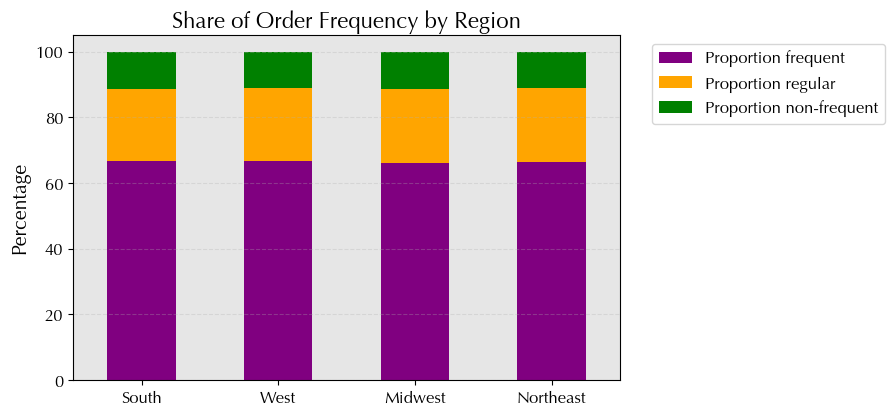

In [27]:
# Plot stacked bars with adjusted parameters
bar_crosstab_region_freq_relative = crosstab_region_freq[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.bar(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Order Frequency by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.5, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [28]:
# Export bar chart
bar_crosstab_region_freq_relative.figure.savefig(os.path.join(os.path.join(path, '04 Analysis','Visualizations', 'bar_ratio_low_total.png')), bbox_inches='tight')


**_______________________________________________________________________________________________________________**

#### <mark>Results</mark>


* South        10791885

* West          8292913

* Midwest       7597325

* Northeast     5722736


* With 10791885 customers, most of instacarts customer are located in the South region of the USA. Followed by the West, Midwest and Northeast. 

* This is not surprising since the South has the most number of states within the US. 


* Taking a look at the relativity of the customer type among all 4 regions, 

* Frequnt Customer make up to 66.64% to 61% within each respective region.

* Regular-Frequent customer make up to ~22.58%.

* And the non-frecuent customers display only ~11.36%

* 5 missing values in the South 

The results of the relativity calculations demostrate a patter in terms of customer type. For all 4 regions, the majority of customers are Frequent Customer, followed by Regular Customers and at the end the Non-frecuent Customers.


**_______________________________________________________________________________________________________________**

## 3.4 Spending Habit of Regions

### High Spender and low Spender across Region

In [29]:
#Check the amount of different customers

df['customer_type'].value_counts()

customer_type
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [30]:
## Where are they located ?

crosstab_spender_region = pd.crosstab(df['Region'], df['customer_type'], dropna = False)

In [31]:
crosstab_spender_region

customer_type,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### Create subsets for High and Low spender

In [32]:
#Create different subset of showing High spender and low-spender in different plots

highspender=df[df['customer_type'] == 'High spender']
lowspender=df[df['customer_type'] == 'Low spender']

### Group by Regions

In [33]:
#  Group the values (Northeast, West,..) from the column 'Region' 
#.size() will counts the numbers of how often each values appeared within each group (e.g. Northeast, West, Midwest,sOUTH)

grouped_highspender = highspender.groupby('Region').size()
grouped_lowspender = lowspender.groupby('Region').size()

In [34]:
# check head for grouped_high_spender
grouped_highspender

Region
Midwest      155975
Northeast    108225
South        209691
West         160354
dtype: int64

In [35]:
# check head for low-spender
grouped_lowspender

Region
Midwest       7441350
Northeast     5614511
South        10582194
West          8132559
dtype: int64

### 3.4.1 Visualization: Bar Plot High spender

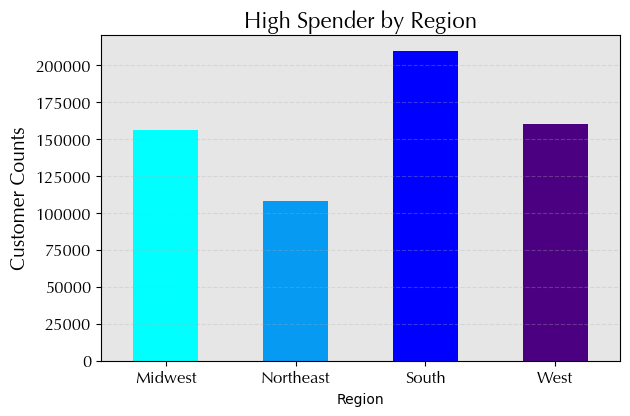

In [36]:
# Plot stacked bars with adjusted parameters
bar_highspender = grouped_highspender.plot.bar(stacked=False, color=['aqua', '#069AF3', 'blue', 'indigo'])

# Set labels and title
plt.title('High Spender by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Region') # Remove x-axis label
plt.ylabel('Customer Counts', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)


plt.show()

In [37]:
# Exporting Bar figure to file on computer

bar_highspender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_spenders.png'))

### 3.4.2 Visualization: Low spender

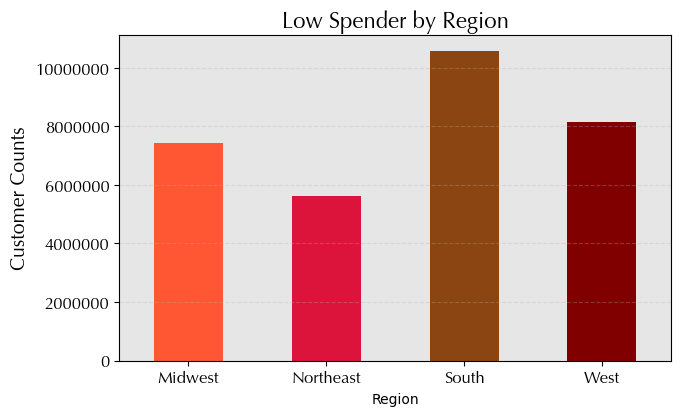

In [38]:
#plotting a bar plot for low 

# Plot stacked bars with adjusted parameters
bar_lowspender = grouped_lowspender.plot.bar(stacked=False, color=['#FF5733', '#DC143C', '#8B4513', '#800000'])

# Set labels and title
plt.title('Low Spender by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Region') # Remove x-axis label
plt.ylabel('Customer Counts', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)


plt.show()


In [39]:
# Adjust layout to prevent labels from being cut off

bar_lowspender.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/2555107878.py:3: UserWarning: The figure layout has changed to tight
  bar_lowspender.figure.tight_layout()


In [40]:
# Code for Exporting Bar figure to file on computer

bar_lowspender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_lowspenders.png'))

### 3.4.3 Ratio of High and Low spender in the Regions

**_______________________________________________________________________________________________________________**

#### <mark>Why?</mark>

* Based on the above results, the South has the most low spenders and the   most high spenders. But the South also has the most states and the most customers. There is a need to create a ratio of low spenders and high spenders based upon total amount of customers by region. This will give a more accurate representation of the proportion of customers in each category, opposed to just the volume alone. 



**_______________________________________________________________________________________________________________**

In [41]:
# crosstab between customer_type and region
crosstab_high_low = pd.crosstab(df['Region'], df['customer_type'])
crosstab_high_low

customer_type,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


### 3.4.3.1 Calculation Relative of High and Low Spenders

In [42]:
# Calculate the total count of usage customer_type and put it in a new column of
# 'Total'

crosstab_high_low['Total'] = crosstab_high_low['High spender'] + crosstab_high_low['Low spender']


# Calculate the proportions of usage frequencies
crosstab_high_low['Proportion High Spender'] = crosstab_high_low['High spender'] / crosstab_high_low['Total'] * 100
crosstab_high_low['Proportion Low Spender'] = crosstab_high_low['Low spender'] / crosstab_high_low['Total'] * 100


# Sort the DataFrame by 'Total' frequency
crosstab_high_low_freq = crosstab_high_low.sort_values(by='Total', ascending=False)


# Display the updated crosstab table with proportions
crosstab_high_low_freq

customer_type,High spender,Low spender,Total,Proportion High Spender,Proportion Low Spender
Region,,,,,
South,209691,10582194,10791885,1.943043,98.056957
West,160354,8132559,8292913,1.933627,98.066373
Midwest,155975,7441350,7597325,2.053025,97.946975
Northeast,108225,5614511,5722736,1.891141,98.108859


### 3.4.3.2 Visualization: Spending Ratio across Regions

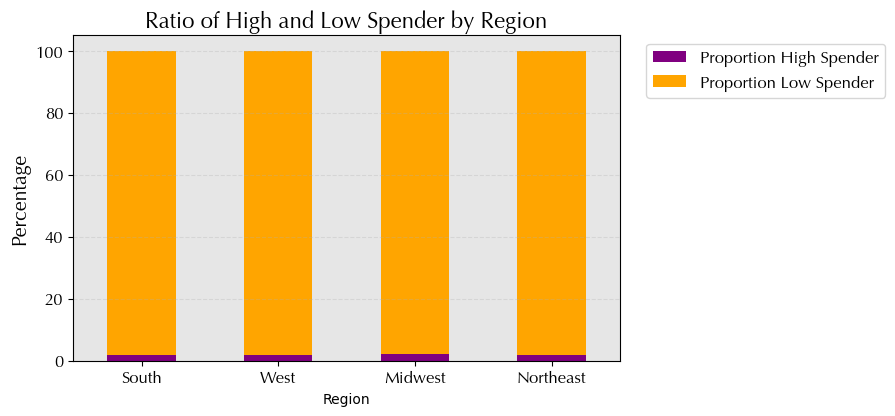

In [43]:
# Plot stacked bars with adjusted parameters
bar_crosstab_high_low_freq = crosstab_high_low_freq[['Proportion High Spender', 'Proportion Low Spender']].plot.bar(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Ratio of High and Low Spender by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Region') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.5, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [44]:
# Adjust layout to prevent labels from being cut off

bar_crosstab_high_low_freq.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/945524420.py:3: UserWarning: The figure layout has changed to tight
  bar_crosstab_high_low_freq.figure.tight_layout()


In [45]:
# Code for Exporting Bar figure to file on computer

bar_crosstab_high_low_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_high_low_freq.png'))

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

* In all 4 regions, the majority (~98%) of our customers are labeled as "Low spender".
* This tells us that most our orders and revenues is likely due to the low spenders.


**_______________________________________________________________________________________________________________**

## 3.5 Revenue by Region

In [46]:
# Group the Region column and calculate the sum of each regions
sum_prices_by_region = df.groupby('Region')['prices'].sum()

In [47]:
sum_prices_by_region

Region
Midwest      59192977.7
Northeast    44530105.8
South        84107910.4
West         64595126.7
Name: prices, dtype: float64

### 3.5.1 Visualization: Revenue by Region

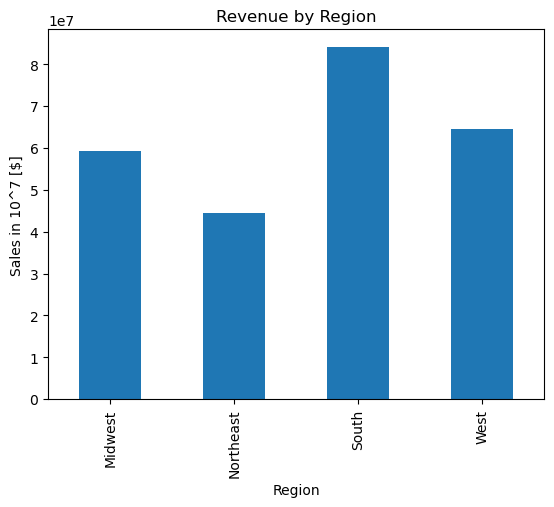

In [48]:
bar_sum_price_by_region=sum_prices_by_region.plot.bar()
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Sales in 10^7 [$]')
plt.show()

In [49]:
# Adjust layout to prevent labels from being cut off

bar_sum_price_by_region.figure.tight_layout()

In [50]:
# Code for Exporting Bar figure to file on computer

bar_sum_price_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sum_price_by_region.png'))

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The total number of customers (both high spenders and low spenders combined) varies between regions, with the South having the highest total number of customers  and the Northeast having the lowest total number of customers.
* Despite differences in the absolute numbers of high spenders between the regions, the differences are relatively small compared to the total number of customers in each region.
* The proportions of high and low spenders by region, the vast majority of customers in all regions are low spenders. 

These observations suggest that while there are differences in the absolute numbers of high spenders between regions, the majority of customers in all regions tend to be low spenders.


* This is refelcted by the total revenue of instacart, in which the total revenue of the south is almost twice as high as the once from the northeast. Fromm 4 Regions,The south alone covers ~33% of total revenue.

**_______________________________________________________________________________________________________________**

## Using 'big' as df_sample from now

## 3.6 Customer Loyalty across Regions

In [51]:
# create crosstabs for Regions and Loyalty

crosstab_loyalty_region=pd.crosstab(big['Region'],big['loyalty'])

In [52]:
# check crosstab
crosstab_loyalty_region


loyalty,Loyal Customer,New customer,Regular customer
Region,,,
Midwest,1662417,1030750,2625185
Northeast,1289489,770022,1946779
South,2383453,1452870,3716596
West,1864746,1117105,2824349


### 3.6.1 Ratio of Loyal Customers

In [53]:
## Calculation for proportion of loyalty among the regions

# Calculate the total count of usage frequencies
crosstab_loyalty_region['Total'] = crosstab_loyalty_region['Loyal Customer'] + crosstab_loyalty_region['New customer'] + crosstab_loyalty_region['Regular customer']

# Calculate the proportions of customer frequencies
crosstab_loyalty_region['Proportion Loyal customer'] = crosstab_loyalty_region['Loyal Customer'] / crosstab_loyalty_region['Total'] * 100
crosstab_loyalty_region['Proportion New customer'] = crosstab_loyalty_region['New customer'] / crosstab_loyalty_region['Total'] * 100
crosstab_loyalty_region['Proportion Regular'] = crosstab_loyalty_region['Regular customer'] / crosstab_loyalty_region['Total'] * 100

# Sort the DataFrame by 'Total' frequency
crosstab_loyalty_region = crosstab_loyalty_region.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
crosstab_loyalty_region

loyalty,Loyal Customer,New customer,Regular customer,Total,Proportion Loyal customer,Proportion New customer,Proportion Regular
Region,,,,,,,
South,2383453,1452870,3716596,7552919,31.556713,19.235874,49.207412
West,1864746,1117105,2824349,5806200,32.116462,19.239864,48.643674
Midwest,1662417,1030750,2625185,5318352,31.258123,19.381004,49.360873
Northeast,1289489,770022,1946779,4006290,32.186612,19.220326,48.593062


### 3.6.2 Visualization: Ratio of Loyal Customers

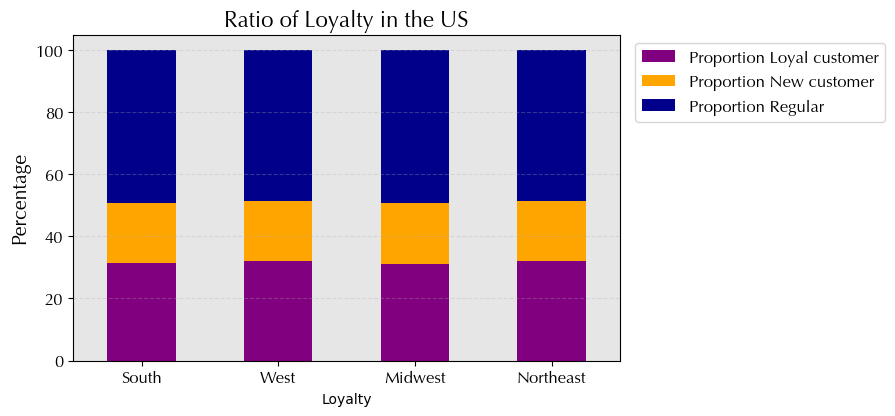

In [54]:
# create stacked plot

# Plot stacked bars with adjusted parameters
bar_crosstab_loyal_region = crosstab_loyalty_region[['Proportion Loyal customer', 'Proportion New customer','Proportion Regular']].plot.bar(stacked=True, color=[color_purple, color_orange,'darkblue'])

# Set labels and title
plt.title('Ratio of Loyalty in the US', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Loyalty') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.5, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()


In [55]:
# Export barp
bar_crosstab_loyal_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_loyal_region.png'), bbox_inches='tight')

### 3.6.3 Order Frencuency of Loyal Customers

In [56]:
# Check frequencies of the loyalty flag
big['loyalty'].value_counts()

loyalty
Regular customer    11112909
Loyal Customer       7200105
New customer         4370747
Name: count, dtype: int64

### 3.6.4 Ratio of Orders placed by Loyalty

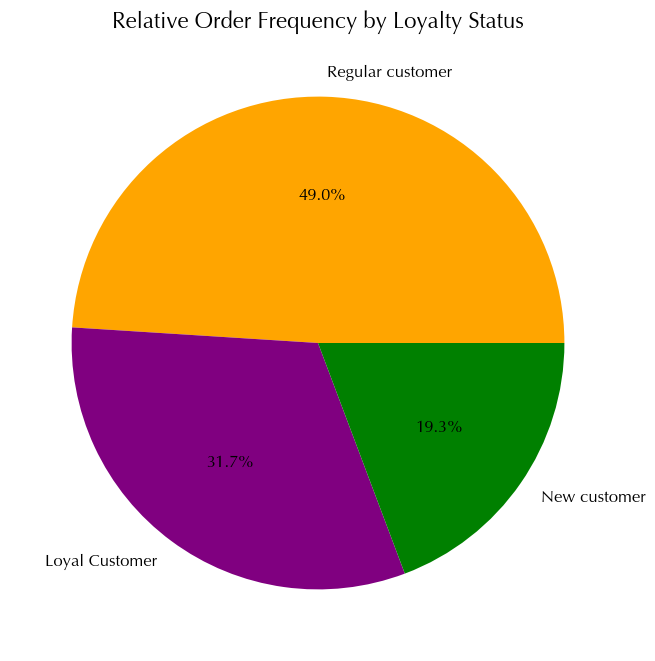

In [57]:
# Calculate the percentage values for each category
loyalty_percentage = big['loyalty'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_loyalty_relative = loyalty_percentage.plot(kind='pie', figsize=figsize, colors=[color_orange, color_purple, color_green], autopct='%1.1f%%')

# Set title and labels
plt.title('Relative Order Frequency by Loyalty Status', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label

# Set font size for percentage values inside the pie chart
for text in pie_loyalty_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [58]:
# Export file
pie_loyalty_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

* Regular customers are the most common group with almost 11,112,909 (49%). These customers have placed between 10 and 40 orders in total, indicating that they are frequent buyers, but not necessarily as loyal as the 'Loyal customers' group.

* Loyal customers are the second most common group with a number of 7,200,105 (~32%). These customers have placed more than 40 orders in total, indicating a high level of brand loyalty. They are likely to be repeat customers who use the service or purchase products regularly.

* New customers are the least common group with 4,370,747 (~19%). These customers have placed less than or equal to 10 orders in total. They are new to the service or product and may not have established loyalty.

**_______________________________________________________________________________________________________________**

### 3.6.5 Frequency among Loyalty

In [59]:
# Create crosstab of 'loyalty' and 'frequency'
cross_loyalty_freq2 = pd.crosstab(big['loyalty'], big['frequency'])

cross_loyalty_freq2

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer,nan
loyalty,,,,
Loyal Customer,7197196,0,2909,0
New customer,1154163,1907939,1308642,3
Regular customer,6740370,638426,3734113,0


In [60]:
# Calculate the total count of usage frequencies
cross_loyalty_freq2['Total'] = cross_loyalty_freq2['Frequent Customer'] + cross_loyalty_freq2['Non-frequent Customer'] + cross_loyalty_freq2['Regular-frequent Customer']

# Calculate the proportions of customer frequencies
cross_loyalty_freq2['Proportion frequent'] = cross_loyalty_freq2['Frequent Customer'] / cross_loyalty_freq2['Total'] * 100
cross_loyalty_freq2['Proportion non-frequent'] = cross_loyalty_freq2['Non-frequent Customer'] / cross_loyalty_freq2['Total'] * 100
cross_loyalty_freq2['Proportion regular'] = cross_loyalty_freq2['Regular-frequent Customer'] / cross_loyalty_freq2['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_loyalty_freq2 = cross_loyalty_freq2.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_loyalty_freq2

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer,nan,Total,Proportion frequent,Proportion non-frequent,Proportion regular
loyalty,,,,,,,,
Regular customer,6740370,638426,3734113,0,11112909,60.653516,5.744904,33.601580
Loyal Customer,7197196,0,2909,0,7200105,99.959598,0.000000,0.040402
New customer,1154163,1907939,1308642,3,4370744,26.406557,43.652499,29.940944


### 3.6.6 Visualization: Frequency among Loyalty

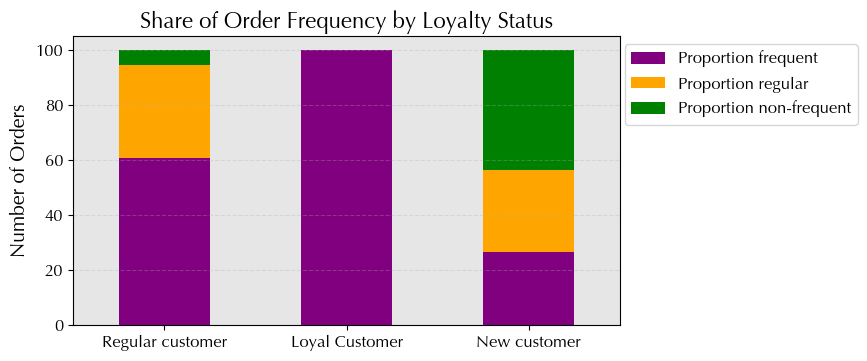

In [61]:
# Plot stacked bars with adjusted parameters
bar_cross_loyalty_freq_relative2 = cross_loyalty_freq2[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.bar(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Order Frequency by Loyalty Status', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.45, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [62]:
# Export file
bar_cross_loyalty_freq_relative2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cross_loyalty_freq_relative2.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Regular customers:**

* They represent the majority of customers with 11,112,909 orders. The majority of orders (60.65%) come from regular customers, indicating a significant proportion of loyal and new customers.

**Loyal customers:** 

* Despite being a smaller group in terms of total customers, loyal customers have a high order frequency. Nearly all (99.95%) of their orders fall into the frequent customer category, reflecting strong brand loyalty and consistent purchasing behavior.

**New customers:**

* This group has the lowest order frequency of the three categories. While they make up a significant portion of the total customer base, their orders are primarily in the non-frequent category, indicating a lower level of engagement compared to regular and loyal customers.

Overall, regular customers drive the highest order frequency, while loyal customers demonstrate the highest level of loyalty and new customers show potential for future engagement. Targeted marketing efforts should focus on retaining core customers, nurturing new customer loyalty, and capitalizing on the high engagement of loyal customers.

**_______________________________________________________________________________________________________________**

### 3.6.7 Spending in Terms of Loyalty

In [63]:
# Create crosstab of 'loyalty' and 'customer_typ'
cross_loyalty_spend2 = pd.crosstab(big['loyalty'], big['customer_type'])

cross_loyalty_spend2

customer_type,High spender,Low spender
loyalty,,
Loyal Customer,151567,7048538
New customer,80586,4290161
Regular customer,211939,10900970


### 3.6.8 Ratio of Spendings

In [64]:
# Calculate the total count of high and low spenders
cross_loyalty_spend2['Total'] = cross_loyalty_spend2['High spender'] + cross_loyalty_spend2['Low spender']

# Calculate the proportions of high and low spenders
cross_loyalty_spend2['Proportion high'] = cross_loyalty_spend2['High spender'] / cross_loyalty_spend2['Total'] * 100
cross_loyalty_spend2['Proportion low'] = cross_loyalty_spend2['Low spender'] / cross_loyalty_spend2['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_loyalty_spend2 = cross_loyalty_spend2.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_loyalty_spend2

customer_type,High spender,Low spender,Total,Proportion high,Proportion low
loyalty,,,,,
Regular customer,211939,10900970,11112909,1.907142,98.092858
Loyal Customer,151567,7048538,7200105,2.105067,97.894933
New customer,80586,4290161,4370747,1.843758,98.156242


### 3.6.9 Visualization: Ratio of spendings

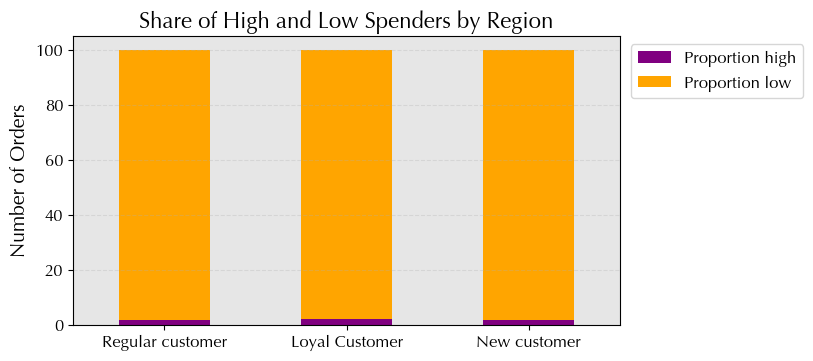

In [65]:
# Plot stacked bars with adjusted parameters
bar_cross_loyalty_spend_relative2 = cross_loyalty_spend2[['Proportion high', 'Proportion low']].plot.bar(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Share of High and Low Spenders by Region', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.35, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [66]:
# Export file
bar_cross_loyalty_spend_relative2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cross_loyalty_spend_relative2.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**High spenders:**

* Regular customers have the highest number of high spenders with 211,939, followed by loyal customers with 151,567. New customers have the lowest number of high spenders at 80,586. However, when looking at high spenders as a percentage of total customers within each loyalty group, loyal customers have the highest percentage of high spenders (~2%), followed by regular customers (~1.9%) and new customers ~~1.8%).

**Low spenders:**

* Regular customers also have the highest number of low spenders at 10,900,970, followed by loyal customers at 7,048,538. New customers have the lowest number of low spenders at 4,290,161. Within each loyalty group, the percentage of low spenders is highest among new customers (98.1%), followed by regular customers (98.09%) and loyal customers (97.89%).

Overall, regular customers are the largest customer segment in terms of both high and low spenders. Loyal customers have a higher proportion of high spenders than other loyalty groups, indicating greater purchasing power and potentially higher loyalty. New customers have a higher proportion of low spenders, which may be due to their unfamiliarity with the platform or cautious spending patterns as they explore available products and services.

**_______________________________________________________________________________________________________________**

## 3.7 Popular Department among Region

### 3.7.1 Top 5 Departments across Regions

In [67]:
# Group by region and department, then get the value_counts
Region_department_counts = big.groupby(['Region', 'department']).size()

# Unstack the dataframe to make demographic_profile the columns
demographic_department_counts = Region_department_counts.unstack(level=0)

# Select only the top 5 departments for each demographic profile
demographic_top5_department = demographic_department_counts.apply(lambda x: x.nlargest(5), axis=0)

demographic_top5_department

Region,Midwest,Northeast,South,West
department,,,,
produce,1559869,1166089,2212340,1698239
dairy eggs,884840,668141,1257637,969131
snacks,471902,360326,669701,519598
beverages,437733,338688,629203,476180
frozen,367100,273739,523764,399733


### 3.7.2 Visualization: Top 5 Departments across Regions

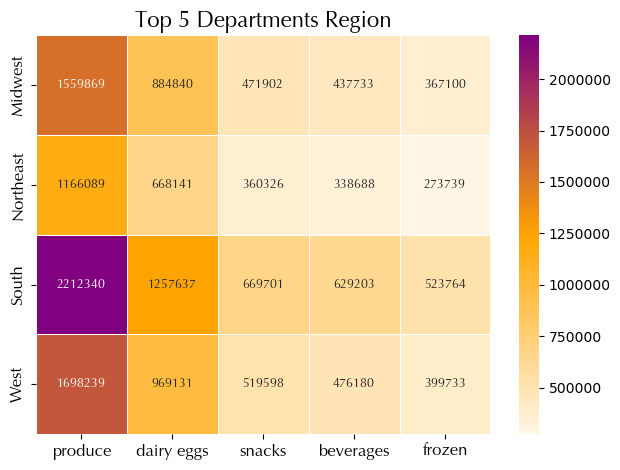

In [68]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_demographic_top5_department = sns.heatmap(demographic_top5_department.T, cmap=custom_cmap, annot=True, annot_kws={'size': 9, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Top 5 Departments Region', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_demographic_top5_department.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [69]:
# Export barp
heat_demographic_top5_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_demographic_top5_department.png'), bbox_inches='tight')

### Visualization: Bar Plot

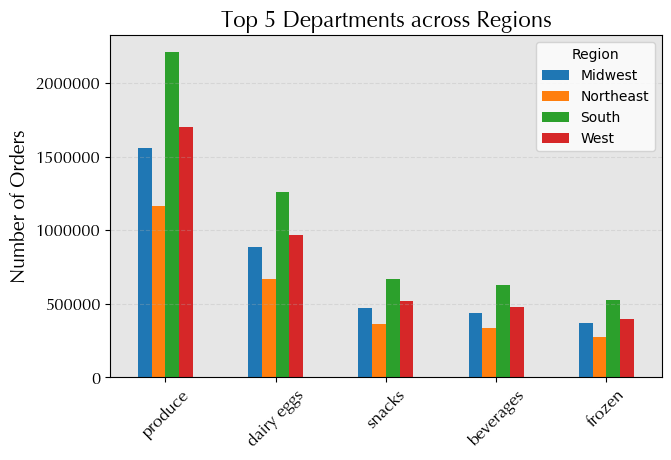

In [70]:
bar_demographic_top5_department=demographic_top5_department.plot(kind='bar')


# Set title and labels
plt.title('Top 5 Departments across Regions', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove the x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate tick labels on x-axis for better readability
plt.xticks(rotation=45)

plt.show()

In [71]:
# Export barp
bar_demographic_top5_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_top5_department.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

* Among all 21 Departments, #1 Produce, #2 Dairy Eggs, #3 Snacks,#4  Beverages and #5 Frozen and the top 5 department
* For all 4 Regions , it follows the same ranking as shown.
* The South demonstrates the highest amount of orders in all departments , especially in the produce department where the highest amount is 2,212,340 items ordered.
* The Northeast has the lowest order number of all 4 regions in all departments.

Overall, since the south has the highest number of customers it is not surprising about the numbers. However, it would be wise to increase advertisement or marketing in the Northeast to increase the interest of customers for the products provided by instacart.

**_______________________________________________________________________________________________________________**

## 3.7.3 Popular Departments across Regions

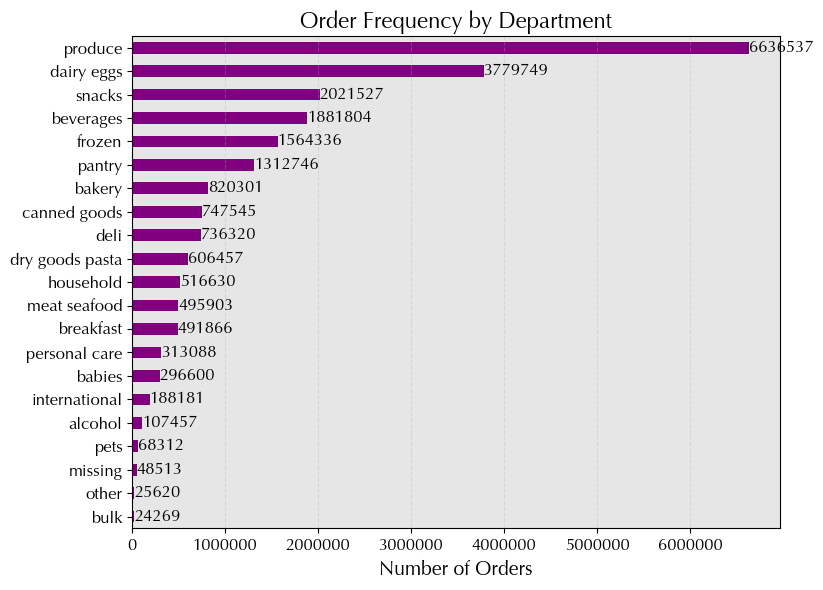

In [72]:
# Set plot size
plt.figure(figsize=(8, 6))

# Plot the horizontal bar chart
barh_departments = big['department'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Department', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values to the bars
for index, value in enumerate(big['department'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

In [73]:
barh_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_top5_department.png'), bbox_inches='tight')

## 3.8 Top 5 Products acorss Regions

In [74]:
# Group by region and product, then get the value_counts
Region_product_counts = big.groupby(['Region', 'product_name']).size()

# Unstack the dataframe to make demographic_profile the columns
Region_product_counts = Region_product_counts.unstack(level=0)

# Select only the top 5 departments for each demographic profile
demographic_top5_products = Region_product_counts.apply(lambda x: x.nlargest(5), axis=0)

demographic_top5_products


Region,Midwest,Northeast,South,West
product_name,,,,
Banana,77218.0,58333.0,110796.0,84363.0
Bag of Organic Bananas,62431.0,46830.0,87762.0,68421.0
Organic Strawberries,43215.0,32810.0,61730.0,47436.0
Organic Baby Spinach,39324.0,29570.0,56991.0,43429.0
Organic Hass Avocado,34613.0,26447.0,48865.0,39591.0


### 3.8.1 Visualization: Top 5 Products across Regions

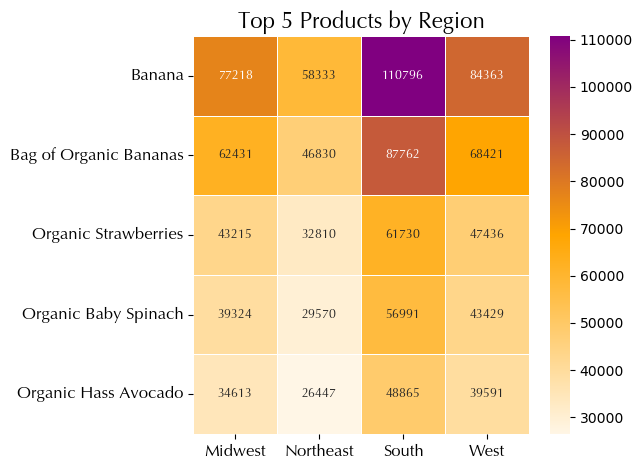

In [75]:
# Plot the transposed heatmap
heat_demographic_top5_product = sns.heatmap(demographic_top5_products, cmap=custom_cmap, annot=True, annot_kws={'size': 9, 'fontfamily': 'Optima'}, fmt='0.0f', linewidths=0.5)

# Set title and labels
plt.title('Top 5 Products by Region', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_demographic_top5_product.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()


In [76]:
# Export barp
heat_demographic_top5_product.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_demographic_top5_product.png'), bbox_inches='tight')

### Visualization: Bar Plot

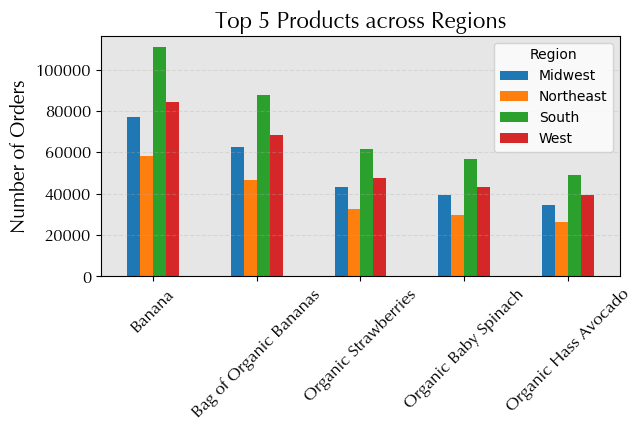

In [77]:
bar_demographic_top5_products=demographic_top5_products.plot(kind='bar')


# Set title and labels
plt.title('Top 5 Products across Regions', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove the x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate tick labels on x-axis for better readability
plt.xticks(rotation=45)

plt.show()

In [78]:
# Export barp
bar_demographic_top5_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_top5_products.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The most popular products across all regins have the following rank:
    * 1. Banana
    * Organic Bananas
    * Organic Strawberries
    * Organic Baby Spinach
    * Organic Hass Avocado
* The bigges consumer of these products is the South with the highest order number of all 5 products.

Overall it can be seen that the south is the biggest consumer of instacart Top 5 products.
The majority of the products are of organic origin except for bananas. This leads to the suggestion that organic products are very popular among the customers but nevertheless, regular banana is the better option in comparison to organic bananas.. According to this, instacart should provide more produce produce of organic origin.
    


## 3.9 Prices

### 3.9.1 Price Distribution

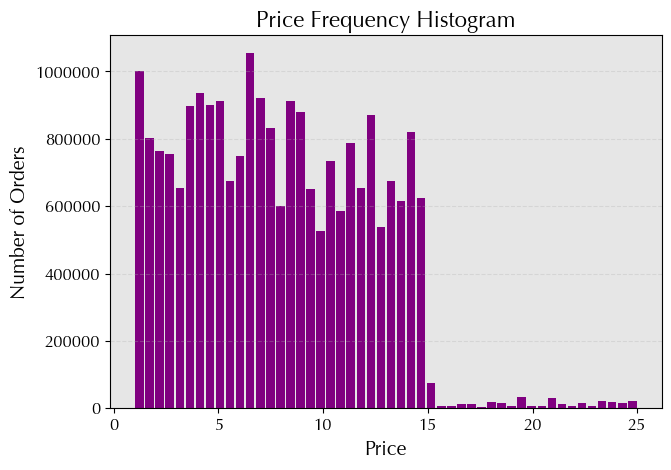

In [79]:
# Plot the histogram
hist_prices2 = big['prices'].plot.hist(bins=50, rwidth=0.85, color=color_purple)

# Set title and labels
plt.title('Price Frequency Histogram', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Price', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [80]:
# Export barp
hist_prices2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices2.png'), bbox_inches='tight')

In [81]:
# Suppress scientific notation by specifying the display format for floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format

big['prices'].describe()

count   22,680,107.00
mean             7.79
std              4.24
min              1.00
25%              4.20
50%              7.40
75%             11.30
max             25.00
Name: prices, dtype: float64

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**Price distribution:**
* The prices of products at Instacart vary widely, as indicated by the relatively large standard deviation of \$4.24. This suggests that there is a wide variety of products with different price tags available on the platform.

**Central tendency:** 
* The mean price of \\$7.79 and the median price of \\$7.40 are close together, indicating that the distribution of prices is approximately symmetric or only slightly skewed.

**Price Range:** 
* The price range extends from a low of \\$1.00 to a high of \\$25.00, reflecting the diversity in the cost of products offered by Instacart.


Based on these descriptive statistics, marketing and sales teams might consider using simpler price range groupings such as 'Low Price,' 'Medium Price,' and 'High Price' to categorize products and effectively target their efforts.

Apart from this, we can see that our customers are willing to pay until //15$, whereas for prices over 15, the frequency of order decreases significantly.
**_______________________________________________________________________________________________________________**

### 3.9.2 Price Range Counts

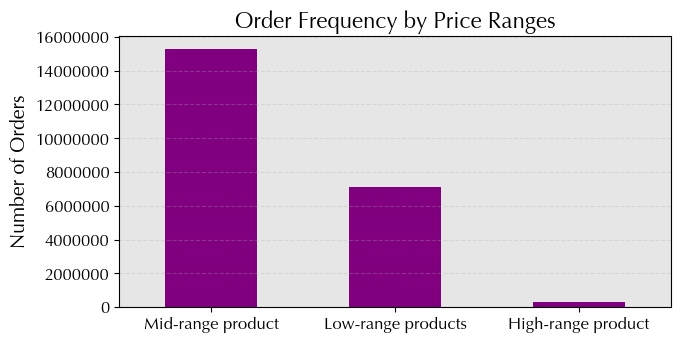

In [82]:
# Plot the horizontal bar chart
bar_price_ranges2 = big['price_range'].value_counts(ascending=False).plot(kind='bar', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Price Ranges', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove the x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate tick labels on x-axis for better readability
plt.xticks(rotation=0)

plt.show()

In [83]:
# Export barp
bar_price_ranges2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_ranges2.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The graph implies that our customers prefer to purchase Mid-Range products rater than High-range products, which is understandable. However, it is yet to find out why customers dont order as myLow-range products as Mid-range products or even more.

* 1 Reason could be that, instacart has more items of mid-range price and less Low-range products.


# 4. Excluding low-activity customer from dataframe

In [84]:
##create a flag for customer who has less than 5 orders

# Set 'low_activity' to 'low_activity' where 'max_order' is less than 5
df.loc[df['max_order'] < 5, 'low_activity'] = 'low_activity'

# Set 'low_activity' to 'False' where 'max_order' is not less than 5
df.loc[df['max_order'] >= 5, 'low_activity'] = 'False'

In [85]:
df[['max_order','low_activity']].head()

,max_order,low_activity
0,8,False
1,8,False
2,8,False
3,12,False
4,12,False


## 4.1 Creating subset for low_activity Customers

### We dont want to delete the original df.
### Just want to exclude the low_activity from out analysis and ###dataframe.

In [86]:
# Create a dataframe without the 'low_activity' marked customers

df_no_low_activity = df[df['low_activity'] != 'low_activity']

## 4.2 Creating subset without low_activity Customers

In [87]:
# Creating a dataframe only with low_activity customers

df_low_activity= df[df['low_activity'] == 'low_activity']

In [88]:
# Check dataframe of df_no_low_activity

df_no_low_activity.head()

,user_id,Gender,address,Age,date_joined,relatives,income,Fam_status,year_joined,order_id,...,busiest_period_of_day,max_order,loyalty,mean_product_price,customer_type,median_days_between_orders,frequency,department,Region,low_activity
0,26711,Female,Missouri,48,1/1/2017,3,165665,married,2017,2543867,...,Most orders,8,New customer,7.99,Low spender,19.00,Regular-frequent Customer,beverages,Midwest,False
1,26711,Female,Missouri,48,1/1/2017,3,165665,married,2017,1285508,...,Most orders,8,New customer,7.99,Low spender,19.00,Regular-frequent Customer,beverages,Midwest,False
2,26711,Female,Missouri,48,1/1/2017,3,165665,married,2017,2578584,...,Most orders,8,New customer,7.99,Low spender,19.00,Regular-frequent Customer,beverages,Midwest,False
3,33890,Female,New Mexico,36,1/1/2017,0,59285,single,2017,1044841,...,Most orders,12,Regular customer,7.06,Low spender,26.00,Non-frequent Customer,beverages,West,False
4,33890,Female,New Mexico,36,1/1/2017,0,59285,single,2017,474720,...,Average orders,12,Regular customer,7.06,Low spender,26.00,Non-frequent Customer,beverages,West,False


In [89]:
# check for low activy customers dataframe
df_low_activity.head()

,user_id,Gender,address,Age,date_joined,relatives,income,Fam_status,year_joined,order_id,...,busiest_period_of_day,max_order,loyalty,mean_product_price,customer_type,median_days_between_orders,frequency,department,Region,low_activity
79,168851,Male,South Carolina,30,1/1/2017,0,63712,single,2017,1903574,...,Average orders,3,New customer,7.49,Low spender,20.50,Non-frequent Customer,beverages,South,low_activity
80,168851,Male,South Carolina,30,1/1/2017,0,63712,single,2017,1193140,...,Most orders,3,New customer,7.49,Low spender,20.50,Non-frequent Customer,beverages,South,low_activity
197,9944,Male,Wisconsin,26,1/1/2017,1,91826,married,2017,246990,...,Most orders,4,New customer,8.16,Low spender,30.00,Non-frequent Customer,beverages,Midwest,low_activity
198,13313,Male,Alaska,31,1/1/2017,2,91111,married,2017,30149,...,Average orders,3,New customer,9.18,Low spender,11.00,Regular-frequent Customer,beverages,West,low_activity
199,13313,Male,Alaska,31,1/1/2017,2,91111,married,2017,30149,...,Average orders,3,New customer,9.18,Low spender,11.00,Regular-frequent Customer,beverages,West,low_activity


In [90]:
# Shape check for df_low_activity and df_no_low_activity

df_no_low_activity.shape

(30964564, 32)

In [91]:
df_low_activity.shape

(1440295, 32)

In [92]:
#descriptive statistics check

df_no_low_activity['max_order'].describe()

count   30,964,564.00
mean            34.43
std             24.90
min              5.00
25%             14.00
50%             28.00
75%             48.00
max             99.00
Name: max_order, dtype: float64

In [93]:
df_low_activity['max_order'].describe()

count   1,440,295.00
mean            3.52
std             0.50
min             1.00
25%             3.00
50%             4.00
75%             4.00
max             4.00
Name: max_order, dtype: float64

## 4.3 Export the Subsets

In [94]:
## Export df_no_low_activity
df_no_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_no_low_activity.pkl'))

In [95]:
## Export df_low_activity
df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','df_low_activity.pkl'))

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* I exported both files,

* df_no_low_activity, will be use for further analysis , since it does not contain any low_activity customers   anymore.

* df_low_activity, will also be exported to keep the customers information for further analysis if required.
**_______________________________________________________________________________________________________________**


# 5. Customer Profiling

### 5. First: import data without low activity customer for further anylsis

In [96]:
# import data for analysis
df2=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df_no_low_activity.pkl'))

In [97]:
# check for all columns again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   user_id                     object 
 1   Gender                      object 
 2   address                     object 
 3   Age                         int64  
 4   date_joined                 object 
 5   relatives                   int64  
 6   income                      int64  
 7   Fam_status                  object 
 8   year_joined                 object 
 9   order_id                    object 
 10  order_number                int64  
 11  weekday_of_order            int64  
 12  time_of_day                 int64  
 13  days_since_previous_order   float64
 14  product_id                  object 
 15  add_to_cart_order           int64  
 16  reordered                   int64  
 17  product_name                object 
 18  department_id               object 
 19  prices                  

## 5.1 Creating a sample subset to represents the Population

In [98]:
# Create random sample starting with seed and boolean list, for a 70/30 ratio

np.random.seed(4)
df2_sample = np.random.rand(len(df2)) <= 0.7

In [99]:
# Place majority 70% of sample in dataframe

big2 = df2[df2_sample]

In [100]:
# Place  30% of sample in dataframe

small2 = df2[~df2_sample]

## 5.2 Create Age Groups

In [101]:
# use .loc() to create age groupe as a new column

big2.loc[(big2['Age'] >= 18) & (big2['Age'] <= 28), 'age_group'] = 'Young Adult'
big2.loc[(big2['Age'] >= 29) & (big2['Age'] <= 40), 'age_group'] = 'Adult'
big2.loc[(big2['Age'] >= 41) & (big2['Age'] <= 55), 'age_group'] = 'Middle-Aged'
big2.loc[(big2['Age'] >= 56) & (big2['Age'] <= 70), 'age_group'] = 'Senior'
big2.loc[(big2['Age'] >= 71) & (big2['Age'] <= 82), 'age_group'] = 'Elderly'

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/2099978432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big2.loc[(big2['Age'] >= 18) & (big2['Age'] <= 28), 'age_group'] = 'Young Adult'


In [102]:
# check age groups
big2['age_group'].value_counts()

age_group
Middle-Aged    5115096
Senior         5024103
Adult          4080691
Elderly        3732488
Young Adult    3723718
Name: count, dtype: int64

## 5.3 Create Income Groups

In [103]:
big2['income'].describe()

count   21,676,096.00
mean        99,680.23
std         43,141.20
min         25,903.00
25%         67,304.00
50%         96,770.00
75%        128,106.00
max        593,901.00
Name: income, dtype: float64

In [104]:
# create income flag 

big2.loc[(big2['income'] >= 20000) & (big2['income'] <= 30000), 'income_level'] = 'Low income'
big2.loc[(big2['income'] > 30000) & (big2['income'] <= 60000), 'income_level'] = 'Mid income'
big2.loc[(big2['income'] > 60000) & (big2['income'] <= 593000), 'income_level'] = 'High income'
big2.loc[(big2['income'] > 5.939010e+05) , 'income_level'] = 'Very high income'

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/3795358193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big2.loc[(big2['income'] >= 20000) & (big2['income'] <= 30000), 'income_level'] = 'Low income'


## 5.4 Creating Income Profile

In [105]:
# Function to create customer profiles based on age group and income
def income_age_group(row):
    age_group = row['age_group']
    income_level = row['income_level']
    
    if age_group == 'Young Adult':
        if income_level == 'Low income':
            return 'Low Income Young Adult'
        elif income_level == 'Mid income':
            return 'Mid Income Young Adult'
        elif income_level == 'High income':
            return 'High Income Young Adult'
    
    elif age_group == 'Adult':
        if income_level == 'Low income':
            return 'Low Income Adult'
        elif income_level == 'Mid income':
            return 'Mid Income Adult'
        elif income_level == 'High income':
            return 'High Income Adult'
    
    elif age_group == 'Middle-Aged':
        if income_level == 'Low income':
            return 'Low Income Middle-Aged'
        elif income_level == 'Mid income':
            return 'Mid Income Middle-Aged'
        elif income_level == 'High income':
            return 'High Income Middle-Aged'
    
    elif age_group == 'Senior':
        if income_level == 'Low income':
            return 'Low Income Senior'
        elif income_level == 'Mid income':
            return 'Mid Income Senior'
        elif income_level == 'High income':
            return 'High Income Senior'
    
    elif age_group == 'Elderly':
        if income_level == 'Low income':
            return 'Low Income Elderly'
        elif income_level == 'Mid income':
            return 'Mid Income Elderly'
        elif income_level == 'High income':
            return 'High Income Elderly'
    
    else:
        return 'Other'

# Apply the function to create a new column 'income_age_group'
big2['income_age_group'] = big2.apply(income_age_group, axis=1)


/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/366288488.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big2['income_age_group'] = big2.apply(income_age_group, axis=1)


## 5.5 Creating Gender-Family-Age Profile

In [106]:
# Function to create customer profiles
def Fam_status_gender(row):
    age_group = row['age_group']
    Gender = row['Gender']
    Fam_status = row['Fam_status']
    
    if age_group == 'Young Adult' and Gender == 'Male' and Fam_status == 'single':
        return 'Single Young Adult Male'
    elif age_group == 'Young Adult' and Gender == 'Female' and Fam_status == 'single':
        return 'Single Young Adult Female'
    elif age_group == 'Young Adult' and Gender == 'Male' and Fam_status == 'married':
        return 'Married Young Adult Male'
    elif age_group == 'Young Adult' and Gender == 'Female' and Fam_status == 'married':
        return 'Married Young Adult Female'
    
    elif age_group == 'Adult' and Gender == 'Male' and Fam_status == 'single':
        return 'Single Adult Male'
    elif age_group == 'Adult' and Gender == 'Female' and Fam_status == 'single':
        return 'Single Adult Female'
    elif age_group == 'Adult' and Gender == 'Male' and Fam_status == 'married':
        return 'Married Adult Male'
    elif age_group == 'Adult' and Gender == 'Female' and Fam_status == 'married':
        return 'Married Adult Female'
    
    elif age_group == 'Middle-Aged' and Gender == 'Male' and Fam_status == 'single':
        return 'Single Middle-Aged Male'
    elif age_group == 'Middle-Aged' and Gender == 'Female' and Fam_status == 'single':
        return 'Single Middle-Aged Female'
    elif age_group == 'Middle-Aged' and Gender == 'Male' and Fam_status == 'married':
        return 'Married Middle-Aged Male'
    elif age_group == 'Middle-Aged' and Gender == 'Female' and Fam_status == 'married':
        return 'Married Middle-Aged Female'
    
    elif age_group == 'Senior' and Gender == 'Male' and Fam_status == 'single':
        return 'Single Senior Male'
    elif age_group == 'Senior' and Gender == 'Female' and Fam_status == 'single':
        return 'Single Senior Female'
    elif age_group == 'Senior' and Gender == 'Male' and Fam_status == 'married':
        return 'Married Senior Male'
    elif age_group == 'Senior' and Gender == 'Female' and Fam_status == 'married':
        return 'Married Senior Female'
    
    elif age_group == 'Elderly' and Gender == 'Male' and Fam_status == 'single':
        return 'Single Elderly Male'
    elif age_group == 'Elderly' and Gender == 'Female' and Fam_status == 'single':
        return 'Single Elderly Female'
    elif age_group == 'Elderly' and Gender == 'Male' and Fam_status == 'married':
        return 'Married Elderly Male'
    elif age_group == 'Elderly' and Gender == 'Female' and Fam_status == 'married':
        return 'Married Elderly Female'
    else:
        return 'Other'

# Apply the function to create a new column 'profile'
big2['Fam_status_gender'] = big2.apply(Fam_status_gender, axis=1)


/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/2788294792.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big2['Fam_status_gender'] = big2.apply(Fam_status_gender, axis=1)


## 5.6 Creating Demographic Profile

In [107]:

# Aggregate data for each user ID
user_data_agg = big2.groupby('user_id').agg({
    'Age': 'first',
    'relatives': 'first',
    'Fam_status': 'first'
}).reset_index()

# Define function for family profile assignment
def get_demographic_profile(relatives, Age, Fam_status):
    if relatives == 0:
        if Age < 30:
            return 'YoungCouple' if Fam_status == 'married' else 'Young_Single'
        elif 30 <= Age < 60:
            return 'AdultCouple' if Fam_status == 'married' else 'Childless_Adult'
        elif Age >= 60:
            return 'SeniorCouple' if Fam_status == 'married' else 'Childless_Senior'
    else:
        if Age < 30:
            return 'YoungFamily' if Fam_status == 'married' else 'Young_Parent'
        elif 30 <= Age < 60:
            return 'AverageFamily' if Fam_status == 'married' else 'Single_Parent'
        elif Age >= 60:
            return 'SeniorFamily' if Fam_status == 'married' else 'Single_Senior'

# Apply family profile assignment function
user_data_agg['demographic_profile'] = user_data_agg.apply(lambda row: get_demographic_profile(row['relatives'], row['Age'], row['Fam_status']), axis=1)        

# Merge the profiles back to the original data
big2 = big2.merge(user_data_agg[['user_id', 'demographic_profile']], on='user_id', how='left')

## 5.7 Time Profile

In [279]:
# Aggregate data for each user ID
user_data_agg2 = big2.groupby('user_id').agg({
    'weekday_of_order': lambda x: x.mode().iloc[0],  # Most common day of the week
    'time_of_day': lambda x: x.mode().iloc[0],  # Most common hour of the day
}).reset_index()


# Get day and hour groups using .loc statements
user_data_agg2.loc[user_data_agg2['weekday_of_order'].isin([0, 1]), 'day_group'] = 'Weekend'
user_data_agg2.loc[~user_data_agg2['weekday_of_order'].isin([0, 1]), 'day_group'] = 'Weekday'
user_data_agg2.loc[(6 <= user_data_agg2['time_of_day']) & (user_data_agg2['time_of_day'] <= 12), 'hour_group'] = 'Morning'
user_data_agg2.loc[(13 <= user_data_agg2['time_of_day']) & (user_data_agg2['time_of_day'] <= 20), 'hour_group'] = 'Afternoon'
user_data_agg2.loc[(user_data_agg2['time_of_day'] < 6) | (user_data_agg2['time_of_day'] > 20), 'hour_group'] = 'LateNight'

# Combine profile components
user_data_agg2['time_profile'] = user_data_agg2['day_group'] + '_' + user_data_agg2['hour_group'] + '_Shopper'

# Merge the profiles back to the original data
big2 = big2.merge(user_data_agg2[['user_id', 'time_profile']], on='user_id', how='left')


# 6 Analysis 

## 6.1 Busiest Day of the Week

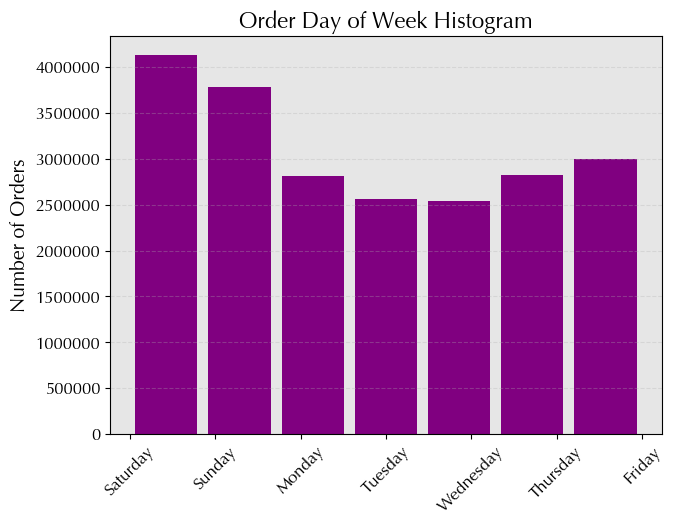

In [111]:
# Use big2 to create histogram for orderday_of_week

# Define the day names
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Plot the histogram
hist_busiest_days = big2['weekday_of_order'].plot.hist(bins=7, rwidth=0.85, color=color_purple)

# Set title and labels
plt.title('Order Day of Week Histogram', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

# Set custom tick labels
plt.xticks(range(7), day_names, rotation=45)

plt.show()

In [112]:
# Adjust layout to prevent labels from being cut off

hist_busiest_days.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/3503019983.py:3: UserWarning: The figure layout has changed to tight
  hist_busiest_days.figure.tight_layout()


In [113]:
hist_busiest_days.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_busiest_day.png'))

## 6.2 Busiest Hours of the Week

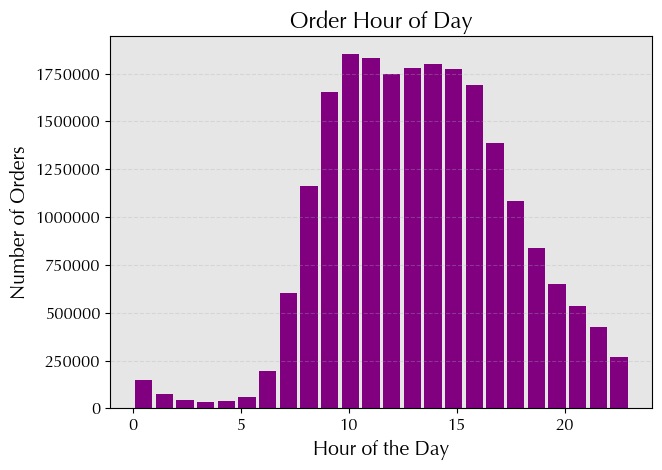

In [114]:
 # Use big2 to create histogram for time_of_day

# Plot the histogram
hist_busiest_hours = big2['time_of_day'].plot.hist(bins=24, rwidth=0.85, color=color_purple)

# Set title and labels
plt.title('Order Hour of Day', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Hour of the Day', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [115]:
# Adjust layout to prevent labels from being cut off

hist_busiest_hours.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/2480095547.py:3: UserWarning: The figure layout has changed to tight
  hist_busiest_hours.figure.tight_layout()


In [116]:
#Export file as png
hist_busiest_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_busiest_hours.png'))

**_______________________________________________________________________________________________________________**

#### <mark>Results</mark>

* The highest order counts are from 10am to 4pm, indicating high activity or demand during these times.
* There are lower order counts during the early morning hours (e.g., 12:00 am - 6:00 am) and late night hours (e.g., 9:00 pm - 11:00 pm), indicating lower activity or fewer orders during those times.

**_______________________________________________________________________________________________________________**

## 6.3 Expenditure during the Day

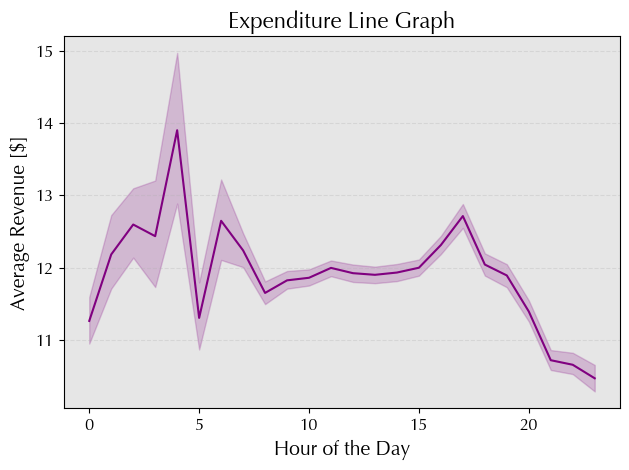

In [117]:
# Plot the line graph
line_expenditure = sns.lineplot(data=big2, x='time_of_day', y='mean_product_price', color=color_purple)

# Set title and labels
plt.title('Expenditure Line Graph', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Hour of the Day', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Average Revenue [$]', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

### Highest peak of Expenditure is at 4am but drops to an average revenue of 11.5 dollars.
### However, the most stable average revenue is between 9am to 4pm, but drops again until Midight.
### After midnight, the average continuou to increase until 4am again.

* However, the time between mIDNIGHT AND 9am shows a strong standard deviation, which means that the average revenue at this time period flactuates from day to day.

In [118]:
# Adjust layout to prevent labels from being cut off

line_expenditure.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/2238918607.py:3: UserWarning: The figure layout has changed to tight
  line_expenditure.figure.tight_layout()


In [119]:
#Export file as png
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditures.png'))

## 6.4 Family Distribution among Age Groups

In [120]:
# create crosstab for fam_Status and age_group

crosstab_fam_age=pd.crosstab(big2['Fam_status'], big2['age_group'])

In [121]:
crosstab_fam_age

age_group,Adult,Elderly,Middle-Aged,Senior,Young Adult
Fam_status,,,,,
married,3057034,2806316,3844927,3748833,1764503
single,1023657,926172,1270169,1275270,1959215


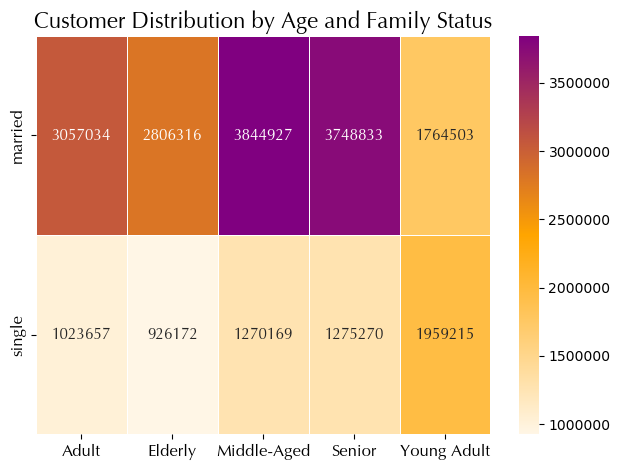

In [122]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_age_family = sns.heatmap(crosstab_fam_age, cmap=custom_cmap, annot=True, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Age and Family Status', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_age_family.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [123]:
# Export heatmap
heat_age_family.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '10_heat_age_family.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>


**Married individuals:**

* Orders were placed by adults, seniors, and young adults in the 'married' category. However, the highest frequency of ordering is observed among adults, followed by seniors and young adults. This suggests that married adults are the most active in their ordering habits, possibly due to household responsibilities and shared financial management.

**Single individuals:** 

* Orders are placed by adults and young adults in the 'single' category, but no orders are attributed to seniors. Among single individuals, adults have a higher order frequency compared to young adults. This suggests that single adults are more engaged in their ordering habits than their younger counterparts.

In summary, the data from the crosstab shows that there is a relationship between age and family status in terms of ordering habits. The frequency of ordering varies between different age groups within each family status group, highlighting the influence of both age and family dynamics on ordering behaviors.

With this we can focus our effort to Middle aged and senior customers , since they are the one who contributes to the most orders

**_______________________________________________________________________________________________________________**

## 6.4.1 Family Status and Number of Relatives

In [124]:
# Create crosstab of 'dependants' and 'family_status'
crosstab_relative_fam = pd.crosstab(big2['Fam_status'], big2['relatives'], dropna=False)

crosstab_relative_fam

relatives,0,1,2,3
Fam_status,,,,
married,0,5047381,5073834,5100398
single,5417137,355931,339380,342035


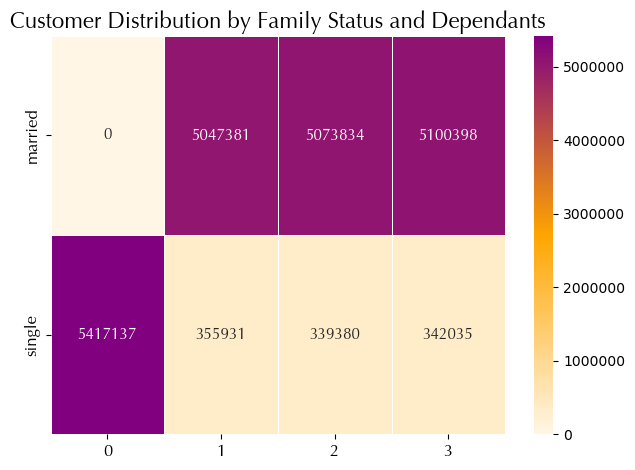

In [125]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_relatives_famstatus = sns.heatmap(crosstab_relative_fam, cmap=custom_cmap, annot=True, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Family Status and Dependants', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_relatives_famstatus.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [126]:
# Export heatmap
heat_relatives_famstatus.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_relatives_famstatus.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* Most of our customers are married with 1 to 3 relatives and singles without relatives.


### 6.4.2 Order Behaviour Married vs. Singles

In [127]:
crosstab_fam_department= pd.crosstab(big2['department'],big2['Fam_status'])

In [128]:
crosstab_fam_department

Fam_status,married,single
department,,
alcohol,69329,31721
babies,201147,85858
bakery,550557,234791
beverages,1265775,534592
breakfast,329500,139609
bulk,16653,6765
canned goods,499403,209240
dairy eggs,2543087,1081436
deli,491522,210909


In [129]:
crosstab_fam_department.describe()

Fam_status,married,single
count,21.00,21.00
mean,"724,838.71","307,356.33"
std,"1,050,245.79","445,955.12"
min,"16,653.00","6,765.00"
25%,"125,363.00","53,722.00"
50%,"346,888.00","143,220.00"
75%,"875,929.00","370,934.00"
max,"4,462,101.00","1,894,802.00"


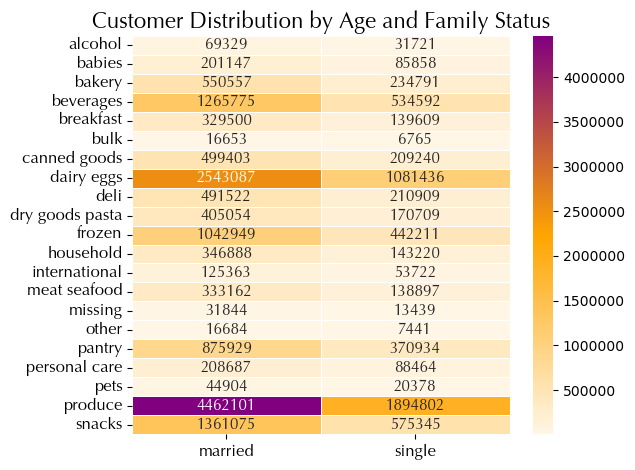

In [130]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_fam_department = sns.heatmap(crosstab_fam_department, cmap=custom_cmap, annot=True, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Age and Family Status', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_fam_department.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [131]:
# Export heatmap
heat_fam_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_fam_department.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**Married:** 

* Married individuals mostly purchased produced products, snacks, dairy products and eggs. But the majority ,with 4462101 orders, of the orders is towards the Produce Department of Instacart.

**Singles:** 

* Single individuals display the same pattern as married individuals but with significantly less order volume. However, the majority of the orders are within the Produce Departmen as well, with 1894802 Orders.

Summary:

Single customers buy only ~42% of the order what married customers would order in the produc, snacks, and diary eggs department.

Suggestions would be to focus on products that is mostly bougt by married customers.

**_______________________________________________________________________________________________________________**

### 6.4.3 Family status and Departments

In [132]:
#create crosstable between Fam_status_gender and Departments
crosstab_Fam_status_gender=pd.crosstab(big2['department'],big2['Fam_status_gender'])
crosstab_Fam_status_gender

Fam_status_gender,Married Adult Female,Married Adult Male,Married Elderly Female,Married Elderly Male,Married Middle-Aged Female,Married Middle-Aged Male,Married Senior Female,Married Senior Male,Married Young Adult Female,Married Young Adult Male,Single Adult Female,Single Adult Male,Single Elderly Female,Single Elderly Male,Single Middle-Aged Female,Single Middle-Aged Male,Single Senior Female,Single Senior Male,Single Young Adult Female,Single Young Adult Male
department,,,,,,,,,,,,,,,,,,,,
alcohol,7942,6578,6422,5903,8230,8452,9937,7748,4044,4073,2564,2511,2190,2247,3065,3589,2917,2610,4934,5094
babies,19879,20183,18737,18269,25842,26323,22834,25671,11244,12165,5891,7223,6072,5708,9163,8304,8528,8188,12199,14582
bakery,55099,54270,51835,50022,70603,69214,67152,68528,30995,32839,18978,18422,17172,16929,22880,23765,22483,23100,34630,36432
beverages,125694,123879,118195,117991,159530,161186,155169,158520,71371,74240,42312,43215,39587,38203,52035,54348,53332,51576,78758,81226
breakfast,33300,32095,31598,30336,41161,42683,39399,39666,18807,20455,10825,10944,9739,9334,13906,13869,13838,14019,21129,22006
bulk,1602,1671,1528,1545,2028,2172,2077,2014,1039,977,603,481,461,454,677,737,671,651,988,1042
canned goods,49565,49831,45868,45684,62205,63609,60351,63411,28280,30599,16932,16767,15021,14788,20149,20757,20108,20664,30784,33270
dairy eggs,258234,254315,235189,234194,318058,325979,307786,311960,143139,154233,87616,85759,79399,75728,104605,105817,108236,106483,159885,167908
deli,50063,48711,45863,44860,61502,62293,59825,61334,27202,29869,16972,16595,15803,14646,20050,21219,20305,21623,32012,31684


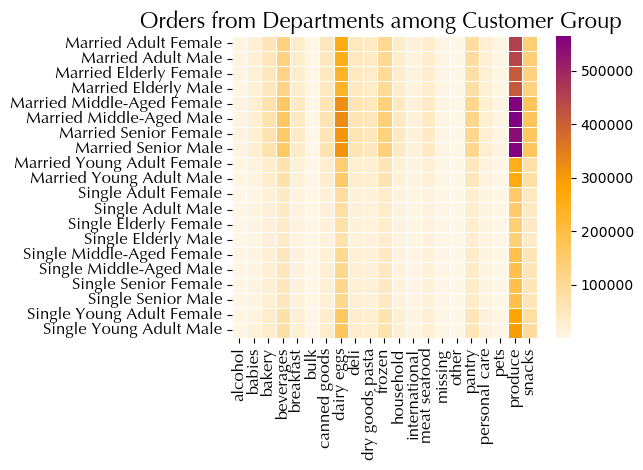

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


# Transpose the DataFrame
crosstab_Fam_status_gender_transposed = crosstab_Fam_status_gender.T

# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080']  # light orange, orange, purple
n_bins = 500  # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap with transposed DataFrame
heat_age_fam_group = sns.heatmap(crosstab_Fam_status_gender_transposed, cmap=custom_cmap, annot=False, annot_kws={'size': 10, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Orders from Departments among Customer Group ', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_age_fam_group.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()



In [134]:
# Export barplot
heat_age_fam_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_age_fam_group.png'), bbox_inches='tight')


### 6.4.4 Top 5 Departments by Family status

In [135]:
# Transpose the DataFrame
transposed_df = crosstab_Fam_status_gender.T

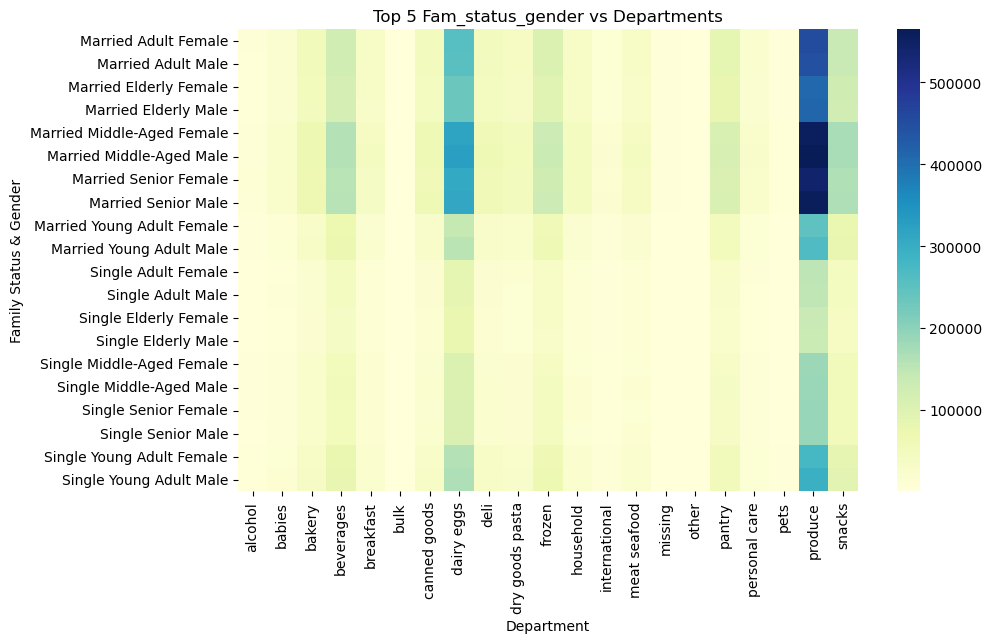

In [136]:
# Create heatmap with switched axes
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(transposed_df, annot=False, cmap="YlGnBu", fmt="d")
plt.title('Top 5 Fam_status_gender vs Departments')
plt.xlabel('Department')
plt.ylabel('Family Status & Gender')

# Save the plot as a PNG file
heatmap.figure.savefig('top5_crosstab_Fam_status_gender.png', bbox_inches='tight')

# Show the plot
plt.show()


**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

* Top 5 Departments are ranked:
  produce, dairy eggs, snacks, baverages, frozen.
  
* Most of the family form are concentrated within produce and dairy eggs department, with the vast majority in produce department among Married middle-aged and married seniors customers.

* Single adult and Single Elderly tend to buy less than the other family form.


**_______________________________________________________________________________________________________________**

## 6.5 Age Group Distribution

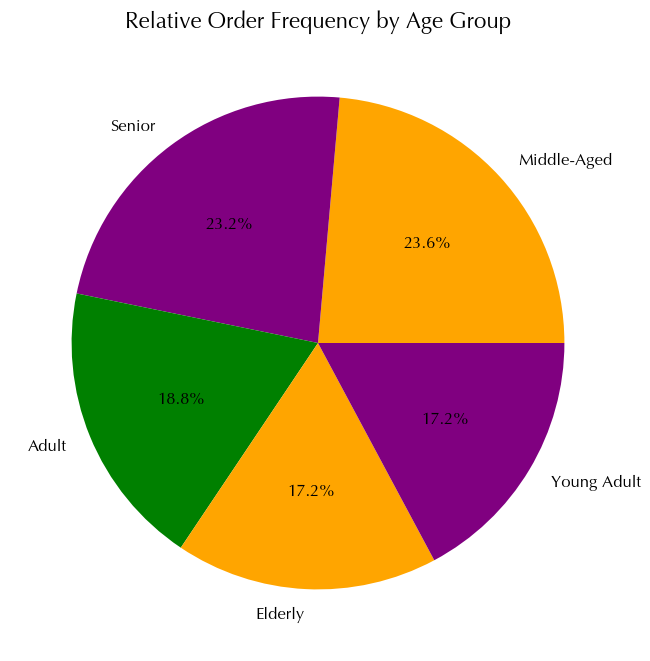

In [139]:

# Count the orders by different frequency values and normalize it
agegroup_distribution = big2['age_group'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_agegroup_distribution = agegroup_distribution.plot(kind='pie', figsize=figsize, colors=[color_orange, color_purple, color_green], autopct='%1.1f%%')

# Set title and labels
plt.title('Relative Order Frequency by Age Group', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label

# Set font size for percentage values inside the pie chart
for text in pie_agegroup_distribution.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()


In [140]:
#Export file as png
pie_agegroup_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_agegroup_distribution.png'))

## 6.5.1 Age Group and Revenues

In [141]:
grouped_price=big2.groupby('age_group')['prices'].sum()
grouped_price

age_group
Adult         31,768,706.50
Elderly       29,078,148.80
Middle-Aged   39,840,749.80
Senior        39,169,521.00
Young Adult   28,976,969.70
Name: prices, dtype: float64

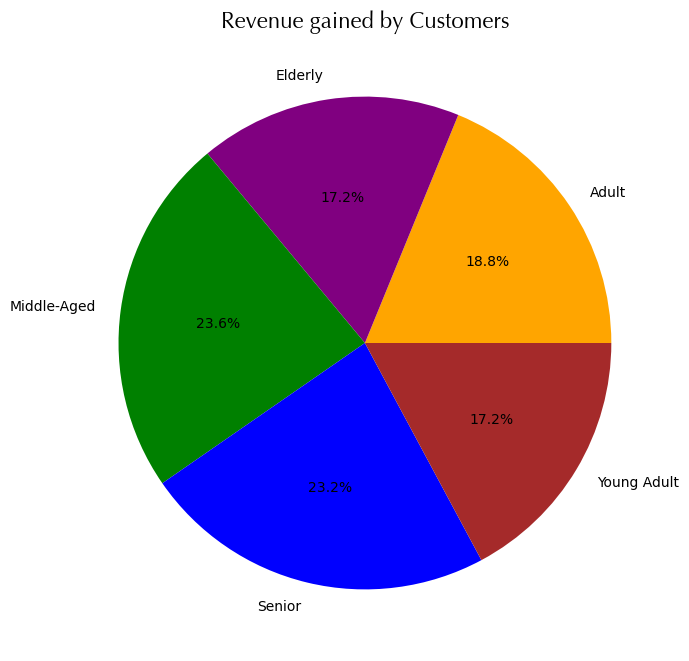

In [142]:

# Plot the pie chart
pie_grouped_price = grouped_price.plot(kind='pie', figsize=figsize, colors=[color_orange, color_purple, color_green,'blue','brown'], autopct='%1.1f%%')



# Set title and labels
plt.title('Revenue gained by Customers', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label



# Set font size for percentage values inside the pie chart
for text in pie_loyalty_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [143]:
# Export heatmap
pie_grouped_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_grouped_price.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

Middle-Aged and Senior customers contribute the most to Instacart's revenue, each accounting for approximately 23.6% and 23.2% respectively. Adults follow closely behind with an 18.8% contribution, while both Young Adults and the Elderly contribute around 17.2%. This suggests that Middle-Aged and Senior customers play a crucial role in driving Instacart's revenue, likely due to their higher purchasing power and regular usage of the platform.


Summary:


**_______________________________________________________________________________________________________________**

## 6.5.2 Age Groups among Departments

In [144]:
# crosstab betwen age group and department

crosstab_age_department= pd.crosstab(big2['department'],big2['age_group'])

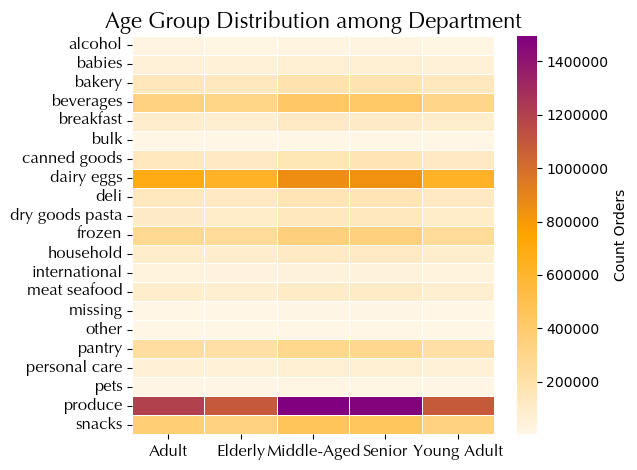

In [145]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_agegroup_department = sns.heatmap(crosstab_age_department, cmap=custom_cmap, annot=False, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Age Group Distribution among Department', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_agegroup_department.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)
colorbar.set_label('Count Orders')

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [146]:
# Export heatmap
heat_agegroup_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_agegroup_department.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**Young Adult:** 

* Young Adult mostly order from the produce department , 1087714 orders.

**Adult:** 

* Adlt mostly order from the produce department, 1202449 orders.

**Middle-Aged:**
* Middle-Aged mostly order from the produce department, 1495502 orders.

**Senior:**
* Seniors mostly order from the produce department, 1478593 orders

**Elderly:**
* Elderly mostly order from the produce department, 1092645 orders


Summary:

Among the Age groups, Middle-Aged and Senior customers display the highest amount of orders in insta cart, following by Adult, Elderly and Young adults. 
It follows a similar trend like the married/single trend in terms of departments of choice:
The most orders are on the produce department, followed by snacks and Dairy Eggs department.


**_______________________________________________________________________________________________________________**

## 6.5.3 Loyalty among Age Groups

In [147]:
# create crosstab between loyalty and age groups
crosstab_agegroup_loyal= pd.crosstab(big2['age_group'],big2['loyalty'])

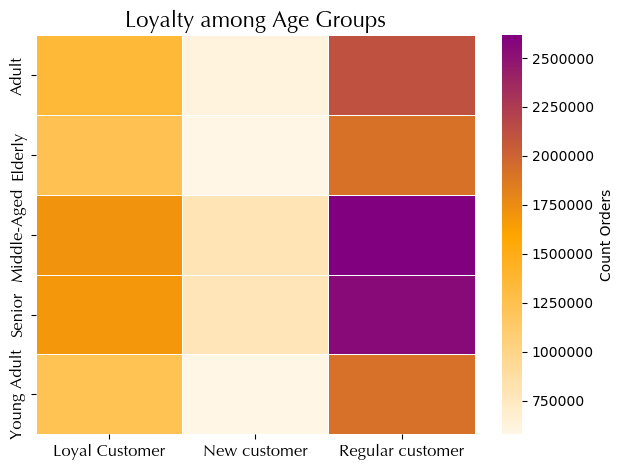

In [148]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_agegroup_loyal = sns.heatmap(crosstab_agegroup_loyal, cmap=custom_cmap, annot=False, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Loyalty among Age Groups', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_agegroup_loyal.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)
colorbar.set_label('Count Orders')
# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [149]:
# Export heatmap
heat_agegroup_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_agegroup_loyal.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**Regular Customer:**
* Regular customers are identified as individuals who have ordered up to 40 items from Instacart.
  According to the heatmap, this group primarily consists of Middle-Aged and Senior customers.
  These customers have collectively ordered more than 2,250,000 items from Instacart.
**Loyal Customer:**
* Loyal customers are defined as customers who have ordered more than 40 items from Instacart.
  Similar to regular customers, loyal customers are predominantly Middle-Aged and Seniors.
  This group has ordered approximately 1,750,000 items from Instacart.
**New Customer:**
* New customers are characterized by individuals who have less than 10 orders.
  The heatmap suggests that this group is mainly comprised of Senior and Middle-Aged individuals.
  Collectively, new customers have ordered between 750,000 and 1,000,000 items from Instacart.

Summary:

Overall, the analysis reveals patterns in customer behavior based on order frequency and age demographics. Regular and loyal customers tend to be older individuals, while new customers also include a significant proportion of seniors and middle-aged individuals. 


**_______________________________________________________________________________________________________________**

### 7. Pie Chart for Customers Frequency

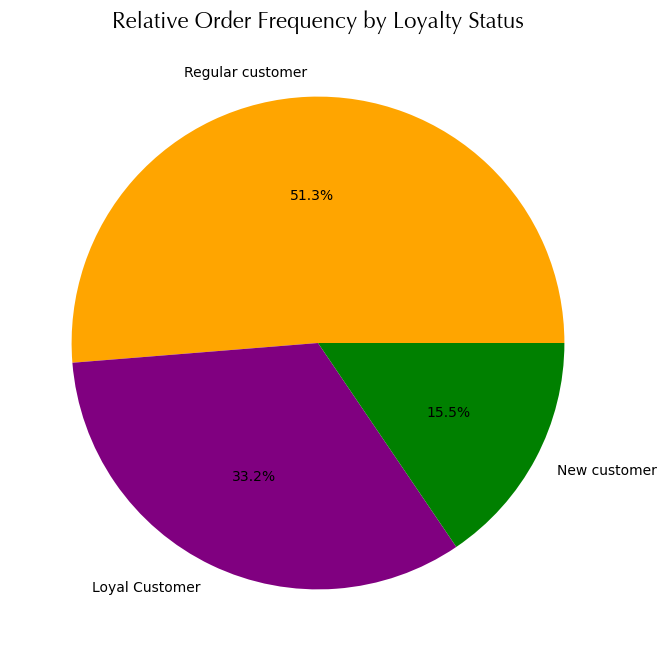

In [150]:
# Count the orders by different frequency values and normalize it
order_loyalty= big2['loyalty'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_loyalty_relative2 = order_loyalty.plot(kind='pie', figsize=figsize, colors=[color_orange, color_purple, color_green], autopct='%1.1f%%')



# Set title and labels
plt.title('Relative Order Frequency by Loyalty Status', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label



# Set font size for percentage values inside the pie chart
for text in pie_loyalty_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [151]:
#Export file as png
pie_loyalty_relative2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty_relative2.png'))

**_______________________________________________________________________________________________________________**

#### <mark>Results</mark>

* Saturday and sunday are our most busiest day in which the most orders arrive
* Wednesday has the lowest count for orders but the number increases again the next day until reaches its peak on saturday

* Regular customers are the most common group with almost  51.3%. These customers have placed between 10 and 40 orders in total, indicating that they are frequent buyers, but not necessarily as loyal as the 'Loyal customers' group.
* Loyal customers are the second most common group with a pecentage of ~33.2%. These customers have placed more than 40 orders in total, indicating a high level of brand loyalty. They are likely to be repeat customers who use the service or purchase products regularly.
* New customers are the least common group with 15.5%. These customers have placed less than or equal to 10 orders in total. They are new to the service or product and may not have established loyalty.

**_______________________________________________________________________________________________________________**

## 8 Popular Departments

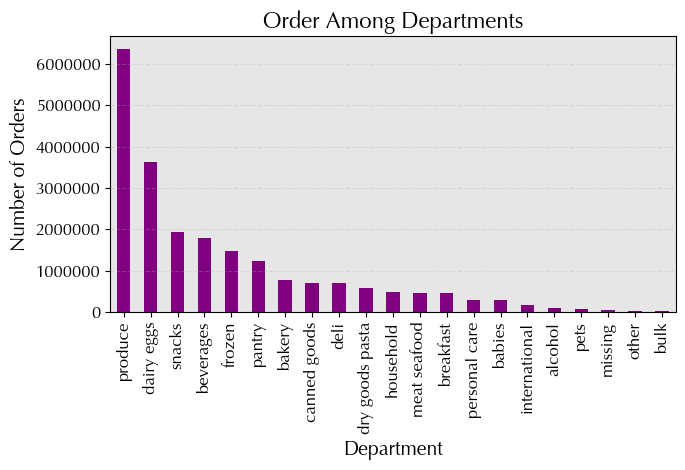

In [158]:
# Use 'big2' to create bar plot counts of order at each department

# Plot
bar_pop_department = big2['department'].value_counts().plot.bar(color=color_purple)

# Set title and labels
plt.title('Order Among Departments', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Department', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [159]:
# Adjust layout to prevent labels from being cut off

bar_pop_department.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/1382688168.py:3: UserWarning: The figure layout has changed to tight
  bar_pop_department.figure.tight_layout()


In [160]:
#Export file as png
bar_pop_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_pop_department.png'))

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* 'Produce' and 'Dairy Eggs' are the most popular departments, with significantly higher order frequencies than others.
* Perishable departments such as 'Produce', 'Dairy Eggs' and 'Frozen' are among the top departments, indicating a high demand for fresh and refrigerated products.
* 'Snacks', 'Beverages' and 'Pantry' also have high order frequencies, indicating a demand for convenience and everyday essentials.
* Departments such as 'Personal Care', 'Baby' and 'Household' have relatively low order frequencies compared to food-related departments, but still show significant demand.
* 'Missing', 'Other' and 'Bulk' have the lowest order frequencies, indicating less popular or specialized categories.

**_______________________________________________________________________________________________________________**

## 9. Price Range Preference?

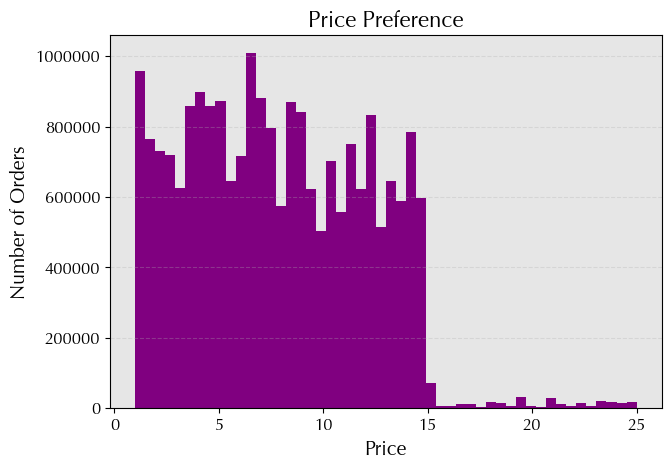

In [161]:
# create bar histogram with 'big2'

hist_price_pref=big2['prices'].plot.hist(bins=50, color=color_purple)

# Set title and labels
plt.title('Price Preference', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Price', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('Number of Orders', fontsize=fontsize_label, fontname=fontname)
        
# Apply formatting for vertical charts
set_plot_settings('vertical')

plt.show()

In [162]:
# Adjust layout to prevent labels from being cut off

hist_price_pref.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/1209427174.py:3: UserWarning: The figure layout has changed to tight
  hist_price_pref.figure.tight_layout()


In [163]:
#Export file as png
hist_price_pref.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_price_pref.png'))

In [164]:
big['prices'].describe()

count   22,680,107.00
mean             7.79
std              4.24
min              1.00
25%              4.20
50%              7.40
75%             11.30
max             25.00
Name: prices, dtype: float64

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Price distribution:**
* The prices of products at Instacart vary widely, as indicated by the relatively large standard deviation of \$4.07. This suggests that there is a wide variety of products with different price tags available on the platform.

**Central tendency:** 
* The mean price of \\$7.79 and the median price of \\$7.40 are close together, indicating that the distribution of prices is approximately symmetric or only slightly skewed.

**Price Range:** 
* The price range extends from a low of \\$1.00 to a high of \\$25.00, reflecting the diversity in the cost of products offered by Instacart.

**Percentiles:** 
* The interquartile range (IQR), which represents the middle 50\% of the data, ranges from the 25th percentile (Q1) of \\$4.20 to the 75th percentile (Q3) of \\$11.30. This range provides insight into the typical price range for most products available on Instacart.

Based on these descriptive statistics, marketing and sales teams might consider using simpler price range groupings such as 'Low Price,' 'Medium Price,' and 'High Price' to categorize products and effectively target their efforts. These groupings can be defined based on the quartiles (Q1, Q2, Q3) or other meaningful divisions in the price distribution.

**_______________________________________________________________________________________________________________**

## 9.1 Most Orders among price rANGE?

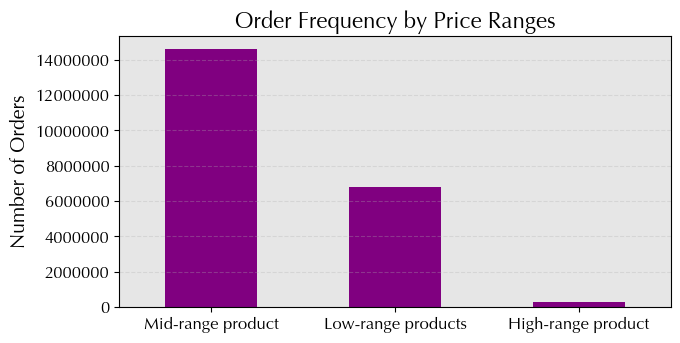

In [165]:
# Plot the horizontal bar chart
bar_price_ranges = big2['price_range'].value_counts(ascending=False).plot(kind='bar', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Price Ranges', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove the x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate tick labels on x-axis for better readability
plt.xticks(rotation=0)

plt.show()

In [166]:
# Adjust layout to prevent labels from being cut off

bar_price_ranges.figure.tight_layout()

/var/folders/dv/_qm6t_j90x5c4lrhz5bm6tb40000gn/T/ipykernel_1239/391364722.py:3: UserWarning: The figure layout has changed to tight
  bar_price_ranges.figure.tight_layout()


In [167]:
#Export file as png
bar_price_ranges.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_ranges.png'))

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Mid-range products:**

* The majority of products fall into the mid-range category, with approximately 20,891,771 products falling into this price range. This indicates that the mid-range price category is the most common among the products offered by Instacart.

**Low-range products:**

* There are a significant number of products categorized as low priced, with approximately 9,674,840 products falling into this category. While not as prevalent as mid-range products, low-range products still make up a significant portion of Instacart's product offering.

**High-range products:**

* High-priced products are the smallest category, with only about 397,953 products falling into this price range. This suggests that high-priced items are less common on Instacart than mid- and low-priced items.

Overall, the distribution suggests that Instacart's product offering is skewed toward mid- and low-priced products, with fewer high-priced items available on the platform.

**_______________________________________________________________________________________________________________**

## 10. Demographic Profile Distribution

In [168]:
# Check frequencies of new column 'demographic_profile'
big2['demographic_profile'].value_counts(dropna=False)


demographic_profile
AverageFamily       7648163
SeniorFamily        5551399
Childless_Adult     2553338
YoungFamily         2022051
Childless_Senior    1851239
Young_Parent        1037346
Young_Single        1012560
Name: count, dtype: int64

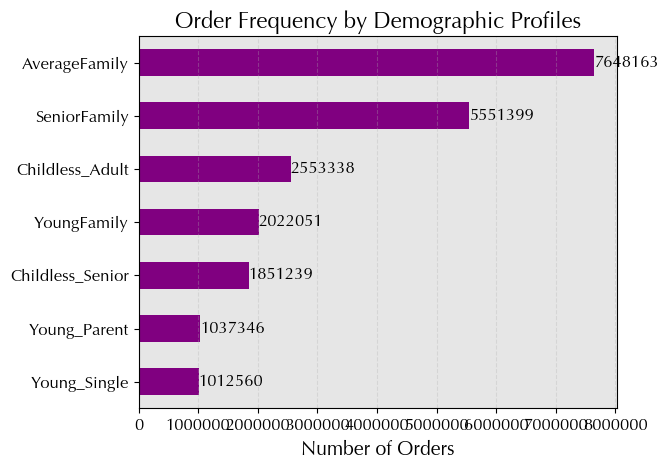

In [169]:
# Plot the horizontal bar chart
bar_demographic_profile = big2['demographic_profile'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Demographic Profiles', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values to the bars
for index, value in enumerate(big2['demographic_profile'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

In [170]:
# Export barplot
bar_demographic_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_profile.png'), bbox_inches='tight')

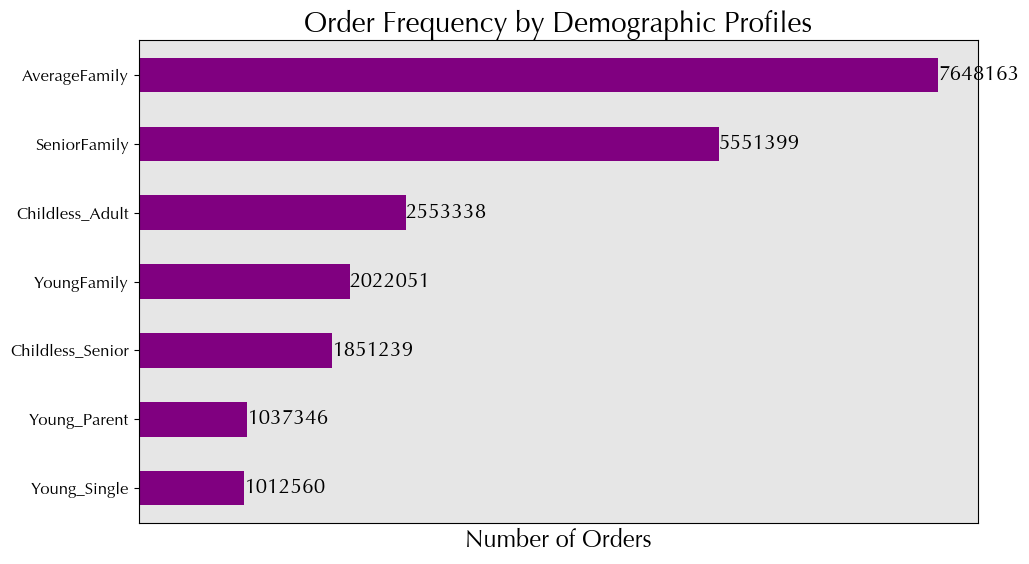

In [171]:
# Set figure size with increased width
plt.figure(figsize=(10, 6))

# Plot the horizontal bar chart
bar_demographic_profile_2 = big2['demographic_profile'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels with larger font size and bold
plt.title('Order Frequency by Demographic Profiles', fontname=fontname, fontsize=fontsize_title + 4, fontweight='bold')
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label + 3, fontweight='bold')
plt.ylabel('', fontname=fontname, fontsize=fontsize_label)  # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values next to the bars with larger font size and bold
for index, value in enumerate(big2['demographic_profile'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick + 3, fontweight='bold')

# Remove x-axis labels
plt.xticks([])

plt.show()


In [172]:
# Export barplot
bar_demographic_profile_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_profile_2.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>
AverageFamily       7648163
SeniorFamily        5551399
Childless_Adult     2553338
YoungFamily         2022051
Childless_Senior    1851239
Young_Parent        1037346
Young_Single        1012560

The sum is 21676096 Orders.

AverageFamily contributes approximately 35.29% of the total orders.
SeniorFamily contributes approximately 25.58%.
Childless_Adult contributes approximately 11.78%.
YoungFamily contributes approximately 9.32%.
Childless_Senior contributes approximately 8.54%.
Young_Parent contributes approximately 4.78%.
Young_Single contributes approximately 4.67%

Summary:
The data reveals that certain demographic profiles, such as AverageFamily and SeniorFamily, contribute the largest proportions of orders, representing approximately 35.29% and 25.58% of the total orders, respectively. Additionally, the data showcases the diversity in consumer behavior, with Childless_Adult, YoungFamily, and other demographic profiles also making substantial contributions to the overall order volume
**_______________________________________________________________________________________________________________**

## 10.1 Usage Frequency

In [173]:
## statistics

demographic_usage_freq = big2.groupby('demographic_profile')['days_since_previous_order'].agg(['min', 'mean', 'max'])

demographic_usage_freq

,min,mean,max
demographic_profile,,,
AverageFamily,0.00,10.83,30.00
Childless_Adult,0.00,10.78,30.00
Childless_Senior,0.00,10.75,30.00
SeniorFamily,0.00,10.81,30.00
YoungFamily,0.00,10.80,30.00
Young_Parent,0.00,10.76,30.00
Young_Single,0.00,10.92,30.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* The minimum value for days since the prior order is 0 for all demographic profiles, reflecting the first purchase of each customer.

**Mean:** 

* The mean days since the prior order ranges from approximately 10.75 to 10.92 across different demographic profiles. This suggests that, on average, customers across different demographic profiles tend to wait a similar amount of time between orders.

**Maximum (max):**

* The maximum value for days since the prior order is consistently 30 for all demographic profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, there is consistency in the distribution of days since the prior order across different demographic profiles, with similar mean values and a maximum value of 30 days across the board.

**_______________________________________________________________________________________________________________**

## 10.2 Demographics by Frequency

In [174]:
# Create crosstab of 'demographic_profile' and 'frequency'
cross_demographic_freq = pd.crosstab(big2['demographic_profile'], big2['frequency'], dropna=False)

cross_demographic_freq

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer
demographic_profile,,,
AverageFamily,5227314,721297,1699552
Childless_Adult,1742669,234781,575888
Childless_Senior,1273579,170611,407049
SeniorFamily,3804496,522089,1224814
YoungFamily,1390168,184155,447728
Young_Parent,721262,97290,218794
Young_Single,683283,96160,233117


In [175]:
# Calculate the total count of frequencies
cross_demographic_freq['Total'] = cross_demographic_freq['Frequent Customer'] + cross_demographic_freq['Non-frequent Customer'] + cross_demographic_freq['Regular-frequent Customer']

# Calculate the proportions of customer frequencies
cross_demographic_freq['Proportion frequent'] = cross_demographic_freq['Frequent Customer'] / cross_demographic_freq['Total'] * 100
cross_demographic_freq['Proportion non-frequent'] = cross_demographic_freq['Non-frequent Customer'] / cross_demographic_freq['Total'] * 100
cross_demographic_freq['Proportion regular'] = cross_demographic_freq['Regular-frequent Customer'] / cross_demographic_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_demographic_freq = cross_demographic_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_demographic_freq

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer,Total,Proportion frequent,Proportion non-frequent,Proportion regular
demographic_profile,,,,,,,
AverageFamily,5227314,721297,1699552,7648163,68.35,9.43,22.22
SeniorFamily,3804496,522089,1224814,5551399,68.53,9.40,22.06
Childless_Adult,1742669,234781,575888,2553338,68.25,9.20,22.55
YoungFamily,1390168,184155,447728,2022051,68.75,9.11,22.14
Childless_Senior,1273579,170611,407049,1851239,68.80,9.22,21.99
Young_Parent,721262,97290,218794,1037346,69.53,9.38,21.09
Young_Single,683283,96160,233117,1012560,67.48,9.50,23.02


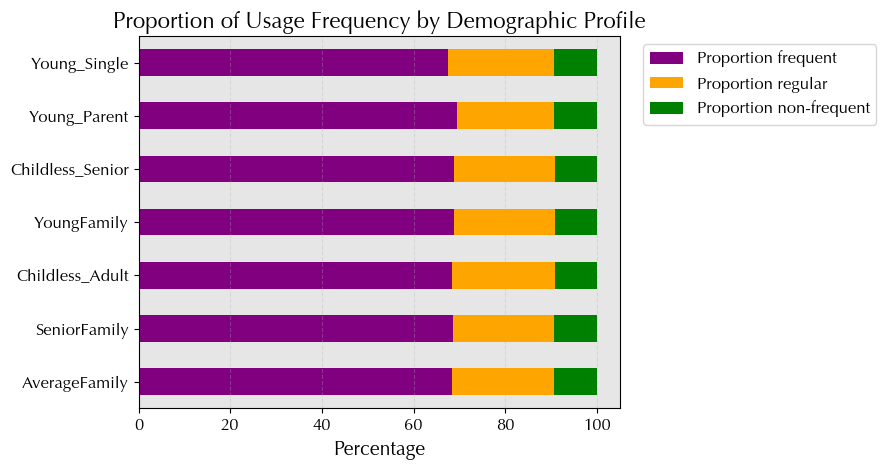

In [176]:
# Plot stacked bars with adjusted parameters
bar_demographic_freq_relative = cross_demographic_freq[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.barh(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Proportion of Usage Frequency by Demographic Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.55, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [177]:
# Export barplot
bar_demographic_freq_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demographic_freq_relative.png'), bbox_inches='tight')

## 10.3 Expenditure

### Descriptive Statistics

In [180]:
# Print descriptive statistics
demographic_prices = big2.groupby('demographic_profile')['prices'].agg(['min', 'mean', 'max'])

demographic_prices

,min,mean,max
demographic_profile,,,
AverageFamily,1.00,7.79,25.00
Childless_Adult,1.00,7.79,25.00
Childless_Senior,1.00,7.80,25.00
SeniorFamily,1.00,7.79,25.00
YoungFamily,1.00,7.78,25.00
Young_Parent,1.00,7.80,25.00
Young_Single,1.00,7.77,25.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

* The lowest price across all demographic profiles is \$1.00, indicating that products are available at a low price point for all customer segments.
* The average prices for each demographic profile are relatively similar, ranging from \\$7.77 to \\$7.80. This suggests that, on average, customers in different demographic profiles tend to purchase products at similar price points.
* The maximum price is consistent across all demographic profiles at \$25.00, indicating that high-priced products are available to all customer segments.

Overall, there is consistency in the price distribution across demographic profiles, with no significant variation in the average or maximum prices.

**_______________________________________________________________________________________________________________**

### 10.4 Spending habit by Demography

In [184]:
# Create crosstab of 'demographic_profile' and 'spending_flag'
cross_demographic_spend2 = pd.crosstab(big2['demographic_profile'], big2['customer_type'], dropna=False)

cross_demographic_spend2

customer_type,High spender,Low spender
demographic_profile,,
AverageFamily,150613,7497550
Childless_Adult,50749,2502589
Childless_Senior,35129,1816110
SeniorFamily,109611,5441788
YoungFamily,40269,1981782
Young_Parent,19728,1017618
Young_Single,16227,996333


In [185]:
# Calculate the total count of high and low spenders
cross_demographic_spend2['Total'] = cross_demographic_spend2['High spender'] + cross_demographic_spend2['Low spender']

# Calculate the proportions of high and low spenders
cross_demographic_spend2['Proportion high'] = cross_demographic_spend2['High spender'] / cross_demographic_spend2['Total'] * 100
cross_demographic_spend2['Proportion low'] = cross_demographic_spend2['Low spender'] / cross_demographic_spend2['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_demographic_spend2 = cross_demographic_spend2.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_demographic_spend2

customer_type,High spender,Low spender,Total,Proportion high,Proportion low
demographic_profile,,,,,
AverageFamily,150613,7497550,7648163,1.97,98.03
SeniorFamily,109611,5441788,5551399,1.97,98.03
Childless_Adult,50749,2502589,2553338,1.99,98.01
YoungFamily,40269,1981782,2022051,1.99,98.01
Childless_Senior,35129,1816110,1851239,1.90,98.10
Young_Parent,19728,1017618,1037346,1.90,98.10
Young_Single,16227,996333,1012560,1.60,98.40


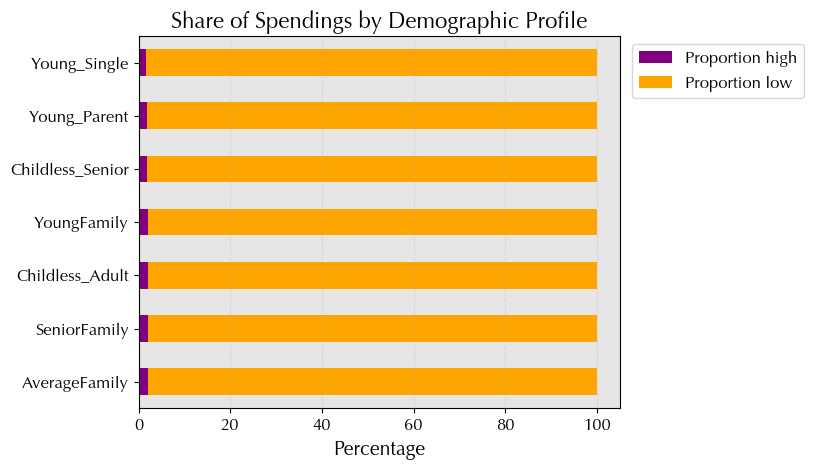

In [186]:
# Plot stacked bars with adjusted parameters
barh_demographic_spend_relative_2 = cross_demographic_spend2[['Proportion high', 'Proportion low']].plot.barh(stacked=True, color=[color_purple, color_orange])

# Set labels and title
plt.title('Share of Spendings by Demographic Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.4, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [189]:
# Export bar chart
barh_demographic_spend_relative_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_demographic_spend_relative_2.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Consistent proportions:**

* Across all demographic profiles, the percentage of low spenders is significantly higher than the percentage of high spenders. This indicates that the majority of customers within each demographic profile tend to spend less rather than more on their grocery purchases.

**Proportions of high spenders:**

* The percentage of high spenders varies slightly among the different demographic profiles, but generally remains low, ranging from 1.61% to 1.99%. This suggests that a small proportion of customers within each demographic profile are responsible for a larger share of total spend.

**Proportions of low spenders:**

* Conversely, the percentage of low spenders is consistently high across all demographic profiles, ranging from 98.01% to 98.39%. This indicates that the majority of customerspers within each demographic profile tend to spend relatively modest amounts on their grocery purchases.

**Relative spending:**

* The chart provides insight into the relative spending levels of different demographic profiles. Profiles such as 'AverageFamily' and 'SeniorFamily' have higher total expenditures compared to profiles such as 'YoungSingle' and YoungParent, which is consistent with expectations based on family size and life stage.

Overall, the analysis highlights the distribution of spending levels across different demographic profiles and underscores the predominance of low spenders within each profile.

## 10.5 Demography across Region

In [190]:
# Create crosstab of 'demographic_profile' and 'region'
cross_demographic_region = pd.crosstab(big2['demographic_profile'], big2['Region'], dropna=False)

cross_demographic_region

Region,Midwest,Northeast,South,West
demographic_profile,,,,
AverageFamily,1802052,1361344,2533869,1950898
Childless_Adult,613372,427749,847801,664416
Childless_Senior,432470,334909,613686,470174
SeniorFamily,1286797,983405,1851682,1429515
YoungFamily,472275,352544,672461,524771
Young_Parent,245714,179584,354227,257821
Young_Single,230629,185003,345917,251011


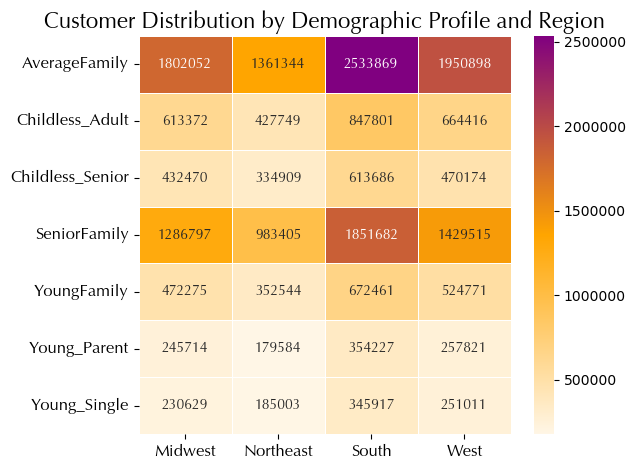

In [191]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_demographic_region = sns.heatmap(cross_demographic_region, cmap=custom_cmap, annot=True, annot_kws={'size': 10, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Customer Distribution by Demographic Profile and Region', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_demographic_region.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [194]:
# Export heatmap
heat_demographic_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_demographic_region.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Family profiles (AverageFamily, SeniorFamily, YoungFamily):**

* These profiles show a similar pattern across regions, with the South region having the highest representation, followed by the Midwest and West regions. The Northeast region generally has the lowest frequency of customers in these family profiles.

**Single profiles (ChildlessAdult, ChildlessSenior, YoungSingle):**

* Customers in these profiles show a consistent distribution across regions, with slightly higher representation in the South and Midwest regions compared to the Northeast and West regions. The Northeast region tends to have the lowest frequency of customers in these single profiles.

**Parent profiles (YoungParent):**

* The distribution of customers in the YoungParent profile mirrors that of the family profiles, with the South region having the highest representation, followed by the Midwest and West regions. The Northeast region has the fewest customers in this profile.

Overall, there's a noticeable trend where the South region tends to have higher frequencies of customers in various demographic profiles, while the Northeast region typically has lower frequencies in most profiles.

**_______________________________________________________________________________________________________________**

## 10.6 Demography by Departments

In [195]:
# Group by demographic_profile and department, then get the value_counts
demographic_department_counts2 = big2.groupby(['demographic_profile', 'department']).size()

# Unstack the dataframe to make demographic_profile the columns
demographic_department_counts2 = demographic_department_counts2.unstack(level=0)

# Select only the top 5 departments for each demographic profile
demographic_top5_2 = demographic_department_counts2.apply(lambda x: x.nlargest(5), axis=0)

demographic_top5_2

demographic_profile,AverageFamily,Childless_Adult,Childless_Senior,SeniorFamily,YoungFamily,Young_Parent,Young_Single
department,,,,,,,
produce,2242027,751760,544239,1629962,590112,301777,297026
dairy eggs,1279452,427613,310117,923704,339931,175043,168663
snacks,685619,227143,165292,493067,182389,92042,90868
beverages,634831,212690,154374,464224,166720,83454,84074
frozen,522952,173971,128461,381032,138965,72188,67591


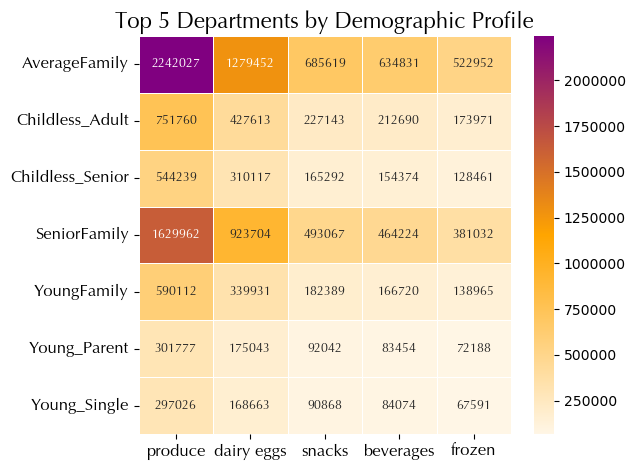

In [196]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_demographic_top5_2 = sns.heatmap(demographic_top5_2.T, cmap=custom_cmap, annot=True, annot_kws={'size': 9, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Top 5 Departments by Demographic Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_demographic_top5_2.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [197]:
# Export heatmap
heat_demographic_top5_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_demographic_top5_2.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

The heatmap shows quite similar ordering habits across different demographic profiles:

**'Produce':**

* This is consistently the most popular department across all demographic profiles, indicating a universal preference for fresh fruits and vegetables.

**'Dairy eggs' and 'Snacks':**

* These departments also maintain a relatively high order count across all demographic profiles, suggesting that items such as dairy and snacks are commonly purchased regardless of demographic characteristics.

**'Beverages' and 'Frozen':**

* While still popular, these departments have slightly lower order counts compared to 'Produce', 'Dairy eggs', and 'Snacks', indicating a relatively lower preference for beverages and frozen foods across all demographic segments.

Overall, there is consistency in ordering habits across demographic profiles, with slight variations in the popularity of specific departments.

**_______________________________________________________________________________________________________________**

## 11. Income profile distribution

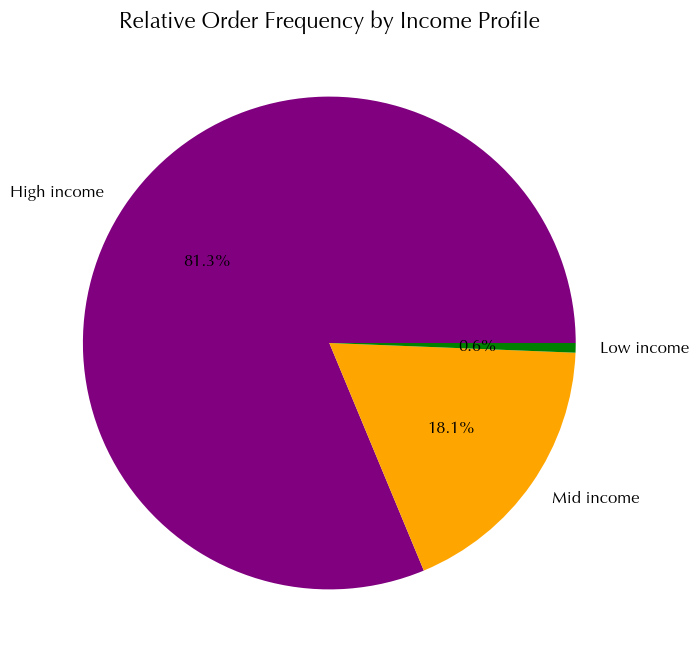

In [198]:
# Calculate the percentage values for each category
income_percentage = big2['income_level'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_income_relative = income_percentage.plot(kind='pie', figsize=figsize, colors=[color_purple, color_orange, color_green], autopct='%1.1f%%')

# Set title and labels
plt.title('Relative Order Frequency by Income Profile', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label

# Set font size for percentage values inside the pie chart
for text in pie_income_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [199]:
# Export heatmap
pie_income_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**High Income:** 

* Customers classified as High Income have the lowest order frequency, with a total of 254,142 orders. This suggests that a smaller proportion of orders come from higher income customers.

**Middle Income:**

* Customers classified as Middle Income have the highest order frequency, with a total of 27,347,868 orders. This indicates that a significant portion of orders come from middle income customers.

**Low Income:**

* Customers classified as Low Income have a lower order frequency than Middle Income customers, with a total of 3,362,554 orders. While still significant, this indicates that lower income customers place fewer orders overall.

Overall, there is a clear trend for order frequency to decrease as income level increases, with Middle Income customers contributing the most to the total number of orders.

**_______________________________________________________________________________________________________________**

### 11.1 Share of Income by demographic profile

In [200]:
# Create crosstab of 'demographic_profile' and 'income_profile'
cross_demographic_income = pd.crosstab(big2['demographic_profile'], big2['income_level'], dropna=False)

cross_demographic_income

income_level,High income,Low income,Mid income
demographic_profile,,,
AverageFamily,6200412,48367,1399384
Childless_Adult,2063316,17367,472655
Childless_Senior,1652225,1620,197394
SeniorFamily,4931291,5904,613754
YoungFamily,1364997,31023,626031
Young_Parent,713156,14097,310093
Young_Single,689471,17590,305499


In [201]:
# Calculate the total income for each demographic profile
cross_demographic_income['Total'] = cross_demographic_income['High income'] + cross_demographic_income['Low income'] + cross_demographic_income['Mid income']

# Calculate the proportions of incomes
cross_demographic_income['Proportion high'] = cross_demographic_income['High income'] / cross_demographic_income['Total'] * 100
cross_demographic_income['Proportion low'] = cross_demographic_income['Low income'] / cross_demographic_income['Total'] * 100
cross_demographic_income['Proportion middle'] = cross_demographic_income['Mid income'] / cross_demographic_income['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_demographic_income = cross_demographic_income.sort_values(by='demographic_profile', ascending=True)

# Display the updated crosstab table with proportions
cross_demographic_income

income_level,High income,Low income,Mid income,Total,Proportion high,Proportion low,Proportion middle
demographic_profile,,,,,,,
AverageFamily,6200412,48367,1399384,7648163,81.07,0.63,18.30
Childless_Adult,2063316,17367,472655,2553338,80.81,0.68,18.51
Childless_Senior,1652225,1620,197394,1851239,89.25,0.09,10.66
SeniorFamily,4931291,5904,613754,5550949,88.84,0.11,11.06
YoungFamily,1364997,31023,626031,2022051,67.51,1.53,30.96
Young_Parent,713156,14097,310093,1037346,68.75,1.36,29.89
Young_Single,689471,17590,305499,1012560,68.09,1.74,30.17


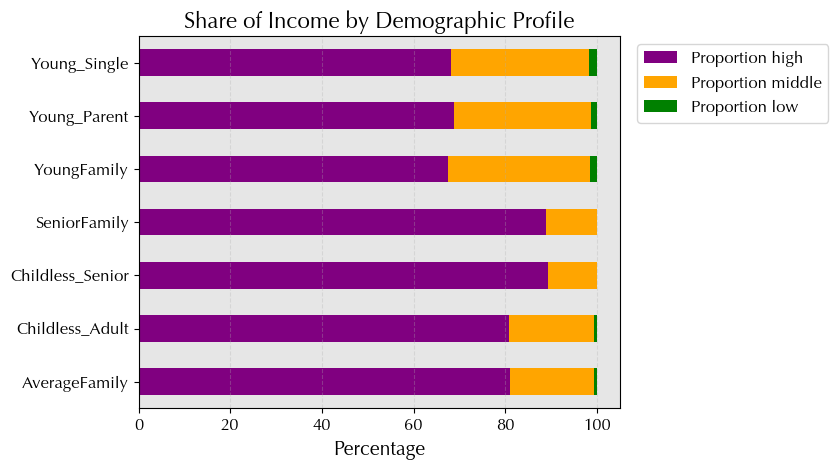

In [202]:
# Plot stacked bars with adjusted parameters
barh_demographic_income_relative = cross_demographic_income[['Proportion high', 'Proportion middle', 'Proportion low']].plot.barh(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Income by Demographic Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.45, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [203]:
# Export heatmap
barh_demographic_income_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_demographic_income_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**AverageFamily, SeniorFamily, ChildlessAdult, and ChildlessSenior:**

* These profiles are predominantly middle-income earners, indicating stability in financial status. This could indicate that these groups are more established in their careers or have a stable financial situation.

**YoungFamily, YoungParent, and YoungSingle:**

* These profiles have a higher proportion of low-income earners than the others. This could indicate that these groups are either in the early stages of their careers, have lower-paying jobs, or face financial challenges such as supporting dependents or managing expenses on a single income.

**SeniorFamily:**

* Although this profile has a high proportion of middle-income earners, it also has a relatively high proportion of high-income earners compared to the other profiles. This suggests that this group may include retirees or individuals with significant savings or investments, leading to a more affluent status in their later years.

**YoungSingle:**

* This profile is characterized by a lower proportion of high-income earners compared to the others. This could indicate that individuals in this group, who are likely to be younger and possibly early in their careers, may have lower earning potential or face financial constraints associated with being single.

Overall, the analysis provides insights into the distribution of income across different demographic profiles, shedding light on the financial status and circumstances of different age and family groups.

**_______________________________________________________________________________________________________________**

## 11.2 Descriptive Statistics

In [204]:
# Print descriptive statistics
income_usage_freq = big2.groupby('income_level')['days_since_previous_order'].agg(['min', 'mean', 'max'])

income_usage_freq

,min,mean,max
income_level,,,
High income,0.00,10.76,30.00
Low income,0.00,11.62,30.00
Mid income,0.00,11.03,30.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* Across all income profiles (High, Low, and Middle), the minimum usage frequency is 0, reflecting the first purchase of each customer.

**Mean:** 

* On average, LowIncome customers have the highest mean usage frequency (11.18), followed by MiddleIncome customers (10.77), and HighIncome customers (10.09). This suggests that LowIncome customers tend to make slightly more orders compared to the other income groups.

**Maximum (max):**

* The maximum value for days since the prior order is consistently 30 for all income profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, there is consistency in the distribution of days since the prior order across different income profiles, with similar mean values and a maximum value of 30 days across the board.

**_______________________________________________________________________________________________________________**

## 11.3 Usage frequency

In [205]:
# Create crosstab of 'income_profile' and 'frequency_flag'
cross_income_freq = pd.crosstab(big2['income_level'], big2['frequency'], dropna=False)

cross_income_freq

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer
income_level,,,
High income,12128083,1592384,3894401
Low income,85479,16633,33856
Mid income,2628759,417366,878685


In [206]:
# Calculate the total count of usage frequencies
cross_income_freq['Total'] = cross_income_freq['Frequent Customer'] + cross_income_freq['Non-frequent Customer'] + cross_income_freq['Regular-frequent Customer']

# Calculate the proportions of customer frequencies
cross_income_freq['Proportion frequent'] = cross_income_freq['Frequent Customer'] / cross_income_freq['Total'] * 100
cross_income_freq['Proportion non-frequent'] = cross_income_freq['Non-frequent Customer'] / cross_income_freq['Total'] * 100
cross_income_freq['Proportion regular'] = cross_income_freq['Regular-frequent Customer'] / cross_income_freq['Total'] * 100

# Sort the DataFrame by 'Total' frequency
cross_income_freq = cross_income_freq.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
cross_income_freq

frequency,Frequent Customer,Non-frequent Customer,Regular-frequent Customer,Total,Proportion frequent,Proportion non-frequent,Proportion regular
income_level,,,,,,,
High income,12128083,1592384,3894401,17614868,68.85,9.04,22.11
Mid income,2628759,417366,878685,3924810,66.98,10.63,22.39
Low income,85479,16633,33856,135968,62.87,12.23,24.90


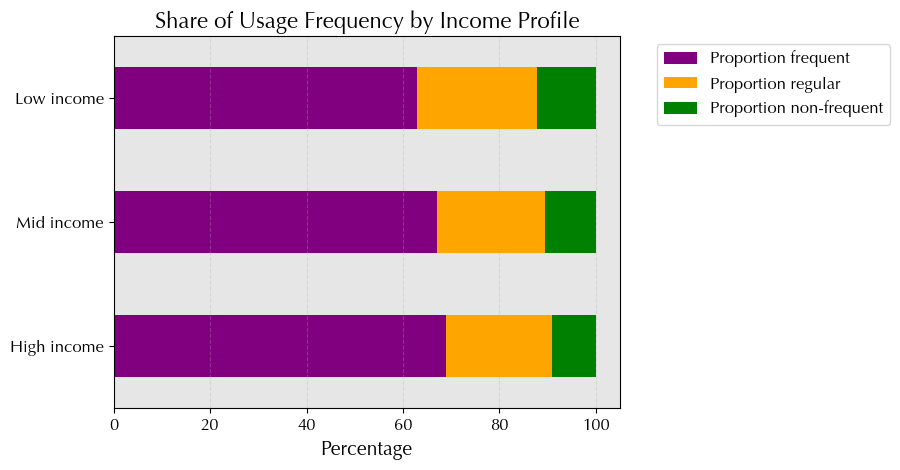

In [207]:
# Plot stacked bars with adjusted parameters
barh_income_freq_relative = cross_income_freq[['Proportion frequent', 'Proportion regular', 'Proportion non-frequent']].plot.barh(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Usage Frequency by Income Profile', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('Percentage', fontsize=fontsize_label, fontname=fontname)
plt.ylabel('') # Remove y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.55, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [208]:
# Export heatmap
barh_income_freq_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barh_income_freq_relative.png'), bbox_inches='tight')

#### **_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**HighIncome:** 
* The highest proportion of orders comes from frequent customers, accounting for 68.85% of total orders. Non-frequent and regular customers account for 9.04% and 22.1% of orders respectively.

**MiddleIncome:** 
* The majority of customers fall into the frequent customer category, accounting for 66.9% of total orders. Non-frequent and regular customers account for 10.63% and 22.39% of orders, respectively.

**LowIncome:** 
* Similar to middle-income customers, the majority are frequent customers, accounting for 62.80% of orders. Non-frequent and regular customers account for 12.23% and 24.9% of orders, respectively.

Overall, there's a tendency for the majority of orders in each income profile to come from frequent customers, suggesting that income level correlates with order frequency, with high-income customers having the highest proportion of frequent orders.

**_______________________________________________________________________________________________________________**

## 11.4 Expenditure

In [209]:
# Print descriptive statistics
income_prices = big2.groupby('income_level')['prices'].agg(['min', 'mean', 'max'])

income_prices

,min,mean,max
income_level,,,
High income,1.00,7.95,25.00
Low income,1.00,6.53,25.00
Mid income,1.00,7.10,25.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* All income profiles have a minimum price of 1.00, indicating the availability of products at a low price point across all income segments.

**Mean:** 

* The mean prices vary slightly across income profiles. LowIncome customers have the lowest mean price of 6.53, while MiddleIncome customers have the highest mean price of 7.95. HighIncome customers fall in between, with a mean price of 7.10.

**Maximum (max):**

* The maximum price remains consistent at 25.00 across all income profiles, suggesting that high-priced products are available to customers across different income levels.

Overall, there are slight differences in mean prices among income profiles, but the distribution of prices remains relatively consistent, with all income groups having access to products at various price ranges.

**_______________________________________________________________________________________________________________**

## 11.5 Income Groups across Departments

In [210]:
# Group by income_level and department, then get the value_counts
income_department_counts = big2.groupby(['income_level', 'department']).size()

# Unstack the dataframe to make income_profile the columns
income_department_counts = income_department_counts.unstack(level=0)

# Select only the top 5 departments for each income profile
income_top5 = income_department_counts.apply(lambda x: x.nlargest(5))

# Reorder the columns in the DataFrame
income_top5 = income_top5[['Low income', 'Mid income', 'High income']]

income_top5

income_level,Low income,Mid income,High income
department,,,
beverages,16460,399732,1384130
dairy eggs,19930,611662,2992864
frozen,8911,256166,1220054
produce,32285,1040866,5283690
snacks,24348,542075,1369976


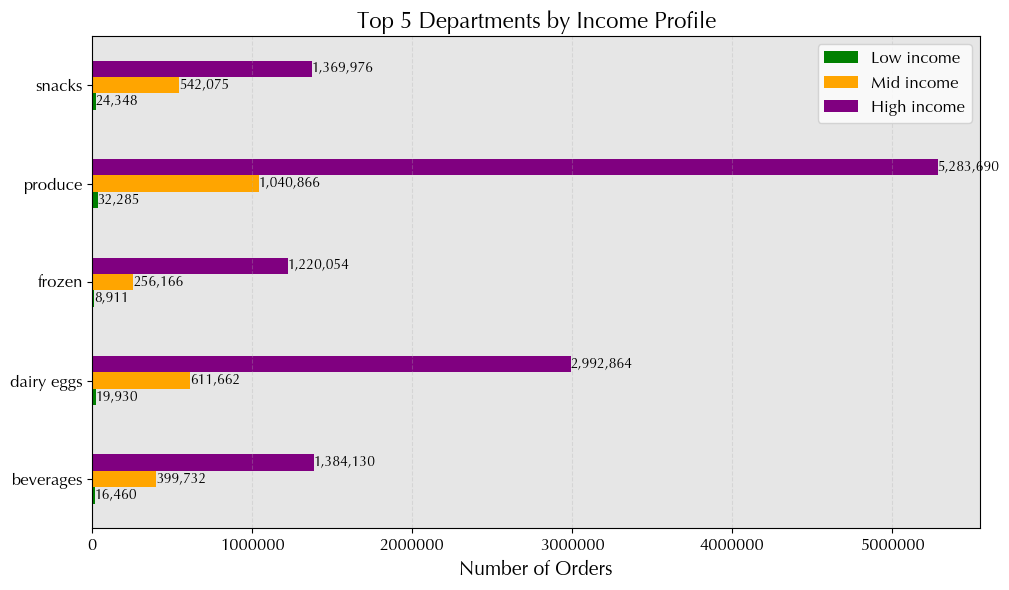

In [211]:
# Plot the grouped bar chart
bar_income_top5 = income_top5.plot(kind='barh', color=[color_green, color_orange, color_purple], figsize=(10, 6))

# Set title and labels
plt.title('Top 5 Departments by Income Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

for i in bar_income_top5.patches:
    # Get the coordinates of the bar
    x = i.get_width()
    y = i.get_y() + i.get_height() / 2
    
    # Add the value to the bar
    bar_income_top5.text(x, y, f'{x:,.0f}', ha='left', va='center', fontname=fontname, fontsize=10)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend)
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [212]:
# Export heatmap
bar_income_top5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_top5.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

Overall, the top 5 department categories—beverages, dairy eggs, frozen, produce, and snacks—are consistent across all three income profiles: HighIncome, LowIncome, and MiddleIncome. While there are differences in the frequency of ordering these departments among the income profiles, the same categories appear as the most frequently ordered items regardless of income level. This suggests that these department categories are essential and commonly purchased by customers across different income profiles.

**_______________________________________________________________________________________________________________**

## 11.6 Price Range Preference by Income Group

In [213]:
crosstab_income_pricerange= pd.crosstab(big2['price_range'],big2['income_level'])

In [214]:
crosstab_income_pricerange

income_level,High income,Low income,Mid income
price_range,,,
High-range product,246586,503,31102
Low-range products,5236497,58555,1479579
Mid-range product,12131785,76910,2414129


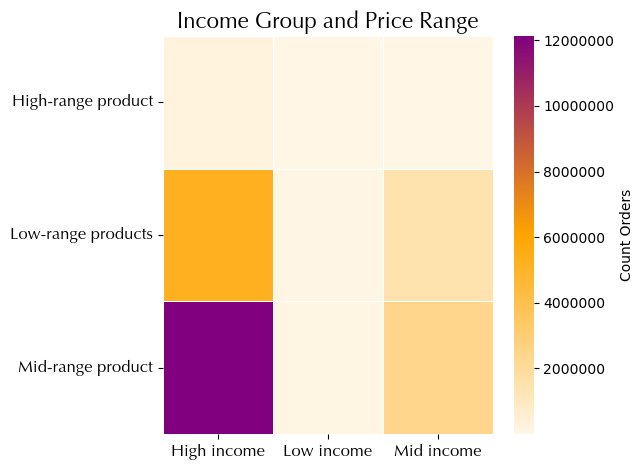

In [215]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_income_pricerange = sns.heatmap(crosstab_income_pricerange, cmap=custom_cmap, annot=False, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Income Group and Price Range', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_income_pricerange.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)
colorbar.set_label('Count Orders')
# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [216]:
# Export heatmap
heat_income_pricerange.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_income_pricerange.png'), bbox_inches='tight')

## 11.7 Share of Price Range

In [230]:
crossta_income_pricerange=pd.crosstab(big2['income_level'],big2['price_range'])
crossta_income_pricerange

price_range,High-range product,Low-range products,Mid-range product
income_level,,,
High income,246586,5236497,12131785
Low income,503,58555,76910
Mid income,31102,1479579,2414129


In [232]:
# Calculate the total count of price ranges for each income profile
crossta_income_pricerange['Total'] = crossta_income_pricerange['High-range product'] + crossta_income_pricerange['Low-range products'] + crossta_income_pricerange['Mid-range product']

# Calculate the proportions of price ranges
crossta_income_pricerange['Proportion high'] = crossta_income_pricerange['High-range product'] / crossta_income_pricerange['Total'] * 100
crossta_income_pricerange['Proportion low'] = crossta_income_pricerange['Low-range products'] / crossta_income_pricerange['Total'] * 100
crossta_income_pricerange['Proportion mid'] = crossta_income_pricerange['Mid-range product'] / crossta_income_pricerange['Total'] * 100

# Sort the DataFrame by 'Total' frequency
crossta_income_pricerange= crossta_income_pricerange.sort_values(by='Total', ascending=False)

# Display the updated crosstab table with proportions
crossta_income_pricerange

price_range,High-range product,Low-range products,Mid-range product,Total,Proportion high,Proportion low,Proportion mid
income_level,,,,,,,
High income,246586,5236497,12131785,17614868,1.40,29.73,68.87
Mid income,31102,1479579,2414129,3924810,0.79,37.70,61.51
Low income,503,58555,76910,135968,0.37,43.07,56.56


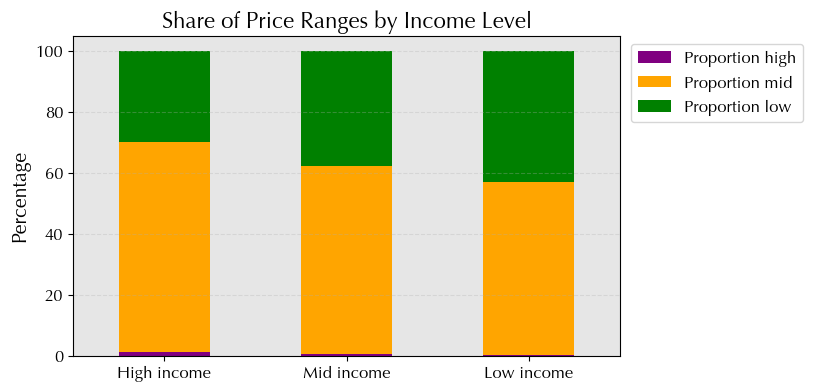

In [233]:
# Plot stacked bars with adjusted parameters
bar_income_prices_relative = crossta_income_pricerange[['Proportion high', 'Proportion mid', 'Proportion low']].plot.bar(stacked=True, color=[color_purple, color_orange, color_green])

# Set labels and title
plt.title('Share of Price Ranges by Income Level', fontsize=fontsize_title, fontname=fontname)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Percentage', fontsize=fontsize_label, fontname=fontname)

# Apply formatting for vertical charts
set_plot_settings('vertical')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Add legend with adjusted font size and style
legend = plt.legend(fontsize=fontsize_legend, loc='upper right', bbox_to_anchor=(1.35, 1))
for text in legend.get_texts():
    text.set_fontname(fontname)

plt.show()

In [235]:
# Export bar chart
bar_income_prices_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_prices_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**MiddleIncome Profile:**

* The high proportion of mid-range products (68.87%) suggests that customers in this income bracket prefer products that offer a balance between quality and affordability. They are likely to prioritize value for money when making purchasing decisions.
* The relatively low share of high-range products (0.79%) suggests that customers in this profile may be less inclined to spend on luxury or premium items. They may prioritize practicality and cost-effectiveness over luxury.

**LowIncome Profile:**

* Despite being in a lower income bracket, customers still allocate a significant portion of their spending to mid-range products (56.56%). This suggests that they prioritize products that offer reasonable quality without stretching their budget too far.
* The relatively low share of high-range products (0.37%) reinforces the notion that customers in this profile are more budget-conscious and may prioritize essential items over luxury or premium products.

**HighIncome Profile:**

* The dominance of mid-range products (68.80%) among high-income customers may indicate a preference for products that offer good quality without excessive cost. While they have the means to afford luxury items, they may opt for more practical choices.
* The significant share of low-range products (29.73%) suggests that even high-income customers are price-sensitive and value-conscious. They may look for cost-effective options and prioritize value for money, even if they can afford higher-priced alternatives.

In summary, these figures reflect the different preferences and spending patterns of different income profiles, highlighting different priorities in terms of product quality, affordability, and value.

**_______________________________________________________________________________________________________________**

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**High income:**
* Customers within the high income segment preferes Mid-range products and have ordered at least 12 Mio items so far.But also shows a highest number of Low-range (up to 6 Mio items) products of all income segments. The least preferd was High-range products with less than 600 orders. 

**Mid income:**
* Customers within this segments mostly buy Mid-rang products (~ 2.4 Mio) and also Low-range products(1.4 Mio).

**Low income :**
* Prefer Mid-range products , followed by Low range products. Order volume less than Mid income customers. And 503 orders from High-range products.
Summary:

The most ordered products fall into the category of "Mid-range products," but they are also labeled as "Low range products," indicating that customers generally prefer products priced at $15 or less.
This preference for mid-range products over low-range products is consistent across all three income levels.


It's surprising that even customers with low-income levels prefer mid-range products over low-range products.
The fact that there are orders for high-range products across all income levels suggests that there is demand for products priced higher than $15 among customers of every income level.
It's not surprising that individuals with high-income levels have a higher number of orders for high-range products, as they may have greater purchasing power and a preference for higher-priced items.



**_______________________________________________________________________________________________________________**

## 12. Orders by Gender

In [236]:
## create crosstab between gender and department
crosstab_gender_department=pd.crosstab(big2['department'],big2['Gender'])

In [237]:
crosstab_gender_department_sorted = crosstab_gender_department.sort_values('Female', ascending=False)
crosstab_gender_department_sorted

Gender,Female,Male
department,,
produce,3152130,3204773
dairy eggs,1802147,1822376
snacks,964382,972038
beverages,895983,904384
frozen,735840,749320
pantry,618620,628243
bakery,391827,393521
deli,349597,352834
canned goods,349263,359380


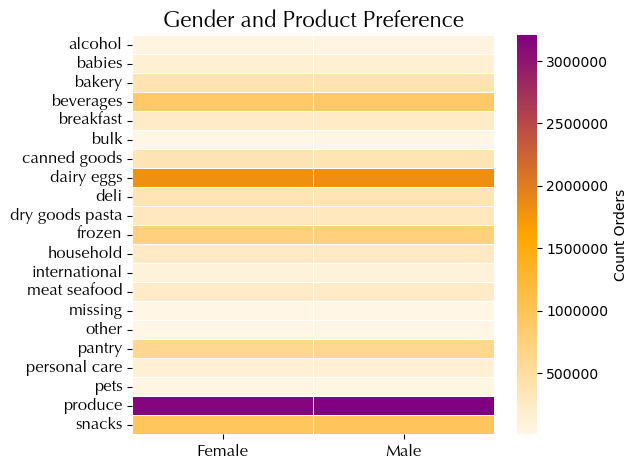

In [238]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_gender_department = sns.heatmap(crosstab_gender_department, cmap=custom_cmap, annot=False, annot_kws={'size': 11, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Gender and Product Preference', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_gender_department.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)
colorbar.set_label('Count Orders')
# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [239]:
# Export heatmap
heat_gender_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_gender_department.png'), bbox_inches='tight')

## 12.1 Share of Gender

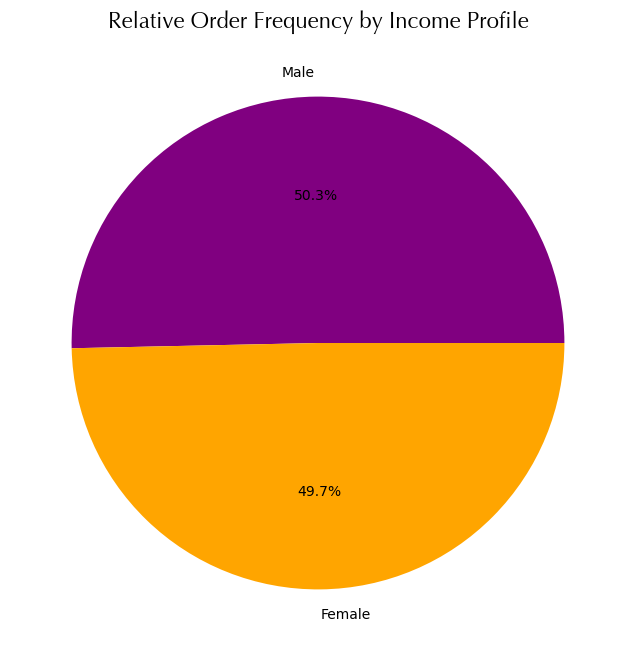

In [240]:
## pie chart
# Calculate the percentage values for each category
percentage_gender = big2['Gender'].value_counts(normalize=True) * 100

# Plot the pie chart
pie_gender_relative = percentage_gender.plot(kind='pie', figsize=figsize, colors=[color_purple, color_orange, color_green], autopct='%1.1f%%')

# Set title and labels
plt.title('Relative Order Frequency by Income Profile', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label

# Set font size for percentage values inside the pie chart
for text in pie_income_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [241]:
# Export heatmap
pie_gender_relative.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_gender_relative.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**Top Departments:**

* Produce, Dairy Eggs, Snacks and Baverages

**Male:**

* Orders more than Female customers in all Top 4 departments.
  The majority of orders are placed on produce department with 3204773 orders.

**Female:**

* Like Male customers, produce department is the most prefered departments among Female customer with 3152130 orders. 


Summary:

Overall, both male and female customers show a preference for the Produce department, which is the most popular department among the top departments, based on order count.



**_______________________________________________________________________________________________________________**

## 13. Departments and Price Range 

In [242]:
# create crosstab between price and department
crosstab_department_price=pd.crosstab(big2['department'],big2['price_range'])

In [243]:
crosstab_department_price

price_range,High-range product,Low-range products,Mid-range product
department,,,
alcohol,0,23166,77884
babies,0,84960,202045
bakery,0,192757,592591
beverages,0,570434,1229933
breakfast,0,146429,322680
bulk,0,811,22607
canned goods,0,197403,511240
dairy eggs,3425,959647,2661451
deli,0,209476,492955


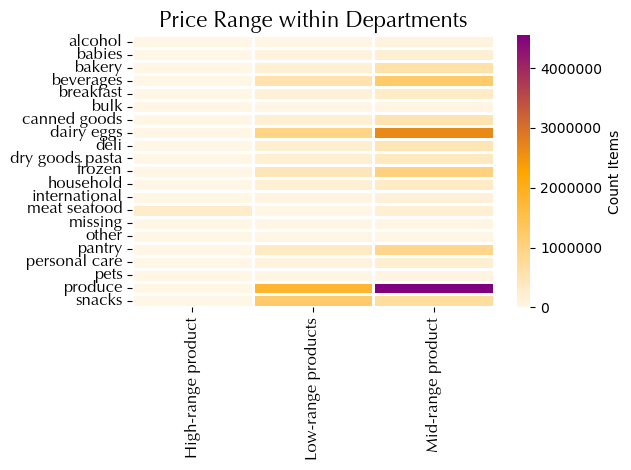

In [244]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_pricerange_department = sns.heatmap(crosstab_department_price, cmap=custom_cmap, annot=False, annot_kws={'size': 10, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.75)

# Set title and labels
plt.title('Price Range within Departments', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('')

# Get the color bar object from the heatmap
colorbar = heat_pricerange_department .collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)
colorbar.set_label('Count Items')
# Apply formatting for heatmaps
set_plot_settings('heat')

plt.show()

In [245]:
# Export heatmap
heat_pricerange_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_pricerange_department.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

**High-range products:**

* Meat and Seafood are place within this department and seems to stand out from the others, with 274621 products beeing labeled.

**Low-range products:**

* Low-range products belong to the snacks, produce dairy eggs and baverages departments

**Mid-range products:**
* The most item within instacart belong to the produce department, with > 4 Mio item counts.
* The second most frequent item belong to the Dairy Eggs department.


Summary:

The majority of products categorized as mid-range are found in the produce department, aligning with our observation of high order volumes in this department. This correlation elucidates why the produce department accounts for the largest share of orders. Additionally, it's noteworthy that despite being labeled as high-range products, the meat and seafood departments also receive orders from the low-income group
**_______________________________________________________________________________________________________________**

## 13.1 Which Age Group spends most Money?

In [246]:
grouped_price=big2.groupby('age_group')['prices'].sum()

In [247]:
grouped_price

age_group
Adult         31,768,706.50
Elderly       29,078,148.80
Middle-Aged   39,840,749.80
Senior        39,169,521.00
Young Adult   28,976,969.70
Name: prices, dtype: float64

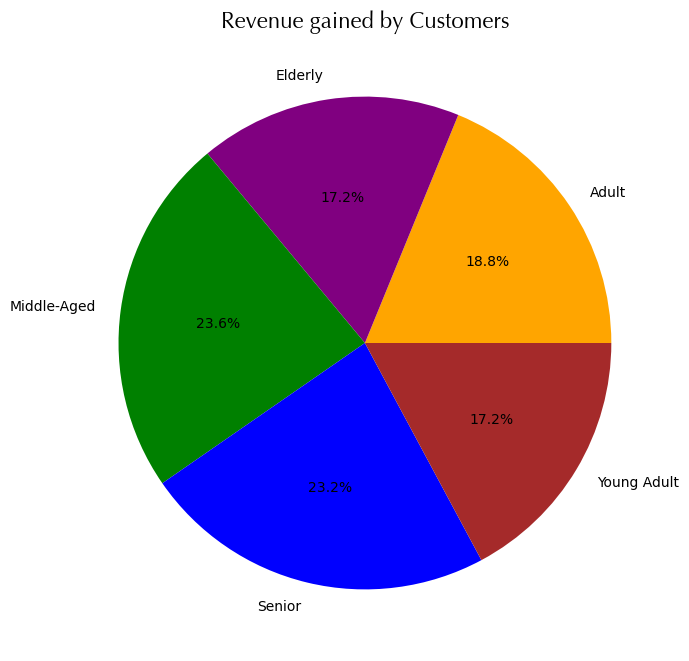

In [248]:

# Plot the pie chart
pie_grouped_price = grouped_price.plot(kind='pie', figsize=figsize, colors=[color_orange, color_purple, color_green,'blue','brown'], autopct='%1.1f%%')



# Set title and labels
plt.title('Revenue gained by Customers', fontname=fontname, fontsize=fontsize_title)
plt.ylabel('')  # Remove the y-axis label



# Set font size for percentage values inside the pie chart
for text in pie_loyalty_relative.texts:
    text.set_fontsize(fontsize_tick)
    text.set_fontname(fontname)

plt.show()

In [249]:
# Export heatmap
pie_grouped_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_grouped_price.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

Middle-Aged and Senior customers contribute the most to Instacart's revenue, each accounting for approximately 23.6% and 23.2% respectively. Adults follow closely behind with an 18.8% contribution, while both Young Adults and the Elderly contribute around 17.2%. This suggests that Middle-Aged and Senior customers play a crucial role in driving Instacart's revenue, likely due to their higher purchasing power and regular usage of the platform.


Summary:


**_______________________________________________________________________________________________________________**

## 14. Visualize Time Distribution

In [280]:
# Check frequencies of new column 'time_profile'
big2['time_profile'].value_counts(dropna=False)

time_profile
Weekday_Afternoon_Shopper    5561649
Weekday_Morning_Shopper      5100697
Weekend_Afternoon_Shopper    5043076
Weekend_Morning_Shopper      4916000
Weekday_LateNight_Shopper     607757
Weekend_LateNight_Shopper     446917
Name: count, dtype: int64

In [2]:
# Set plot size
plt.figure(figsize=(10, 4))

# Plot the horizontal bar chart
ba_time_profile = big2['time_profile'].value_counts(ascending=True).plot(kind='barh', color=color_purple)

# Set title and labels
plt.title('Order Frequency by Time Profiles', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('') # Remove the y-axis label

# Apply formatting for horizontal charts
set_plot_settings('horizontal')

# Add values to the bars
for index, value in enumerate(big2['time_profile'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontname=fontname, fontsize=fontsize_tick)

plt.show()

NameError: name 'plt' is not defined

In [1]:
# Export bar chart
ba_time_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ba_time_profile.png'), bbox_inches='tight')

NameError: name 'bar_time_profile' is not defined

**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>


**Late Night Shopper:**

* Numbers of orders during late night is significantly lower than during other time of the day, regardless of Weekday or Weekend. This suggest that during night time, it is less busy thatn during day time.

**Weekday Shopper**:

* The numbers of orders during afternoon and morning are almost ehe samw. But a closer look into the numbers we can see that most customers prefer to orer items in the afternoon during the week.

* However, the number of morning shopper is high enough to say thatthere are enoug customer who prefers to purchase via instacart in the morning.

Overall, there are clear trends in order frequency across different time profiles, with weekday afternoons and weekday mornings being the busiest times for shopping, followed by weekends. Late nights, both weekdays and weekends, have lower order frequencies.

**_______________________________________________________________________________________________________________**

## 14.1 Descriptive Statistics

### 14.1.1 Usage frequency

In [282]:
# Print descriptive statistics
time_usage_freq = big2.groupby('time_profile')['days_since_previous_order'].agg(['min', 'mean', 'max'])

time_usage_freq

,min,mean,max
time_profile,,,
Weekday_Afternoon_Shopper,0.00,11.16,30.00
Weekday_LateNight_Shopper,0.00,11.20,30.00
Weekday_Morning_Shopper,0.00,10.51,30.00
Weekend_Afternoon_Shopper,0.00,11.30,30.00
Weekend_LateNight_Shopper,0.00,10.95,30.00
Weekend_Morning_Shopper,0.00,10.18,30.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* Across all time profiles, the minimum frequency is 0.00, reflecting the first purchase of each customer.

**Mean:** 

* The mean usage frequency varies among different time profiles, with the highest mean observed for the 'Weekend Afternoon Shopper' group. This indicates that customers who shop in the afternoon on weekend tend to place orders more frequently on average. On the other hand, the 'Weekend Morning Shopper' group has the lowest mean usage frequency, suggesting less frequent order placements during weekend mornings.

**Maximum (max):**

* The maximum frequency is consistent at 30.00 across all time profiles. This indicates that some customers place orders exactly 30 days apart from their previous purchases, possibly indicating a monthly purchasing pattern.

Overall, there are variations in mean frequencies across different time profiles, indicating that customers tend to exhibit different ordering habits depending on the time of day.

**_______________________________________________________________________________________________________________**

### Expenditure

In [283]:
# Print descriptive statistics
time_prices = big2.groupby('time_profile')['prices'].agg(['min', 'mean', 'max'])

time_prices

,min,mean,max
time_profile,,,
Weekday_Afternoon_Shopper,1.00,7.80,25.00
Weekday_LateNight_Shopper,1.00,7.81,25.00
Weekday_Morning_Shopper,1.00,7.75,25.00
Weekend_Afternoon_Shopper,1.00,7.84,25.00
Weekend_LateNight_Shopper,1.00,7.83,25.00
Weekend_Morning_Shopper,1.00,7.77,25.00


**_______________________________________________________________________________________________________________**

#### <mark>Notes</mark>

**Minimum (min):**

* The minimum price for all time profiles is consistently \$1.00, indicating that customers across different time profiles purchase items at similar lower price points.

**Mean:** 

* The mean price varies slightly among different time profiles, with the highest mean observed for the 'Weekend Afternoon Shopper' group. This suggests that customers who shop in the afternoon on weekends tend to spend slightly more on average per order compared to other time profiles.

**Maximum (max):**

* The maximum price represents the highest price of items purchased within each time profile. The maximum price is consistent at \\$25.00 across all time profiles, indicating that there are high-priced items available for purchase regardless of the time profile.

Overall, the descriptive statistics suggest that while there are slight variations in mean spending across different time profiles, the range of prices and the availability of high-priced items remain relatively consistent across all time profiles.

**_______________________________________________________________________________________________________________**

## 14.2 Time of order among Age Groups

In [258]:
#create crosstab
crosstab_fam_stat_time=pd.crosstab(big2['time_of_day'],big2['age_group'])

In [259]:
crosstab_fam_stat_time

age_group,Adult,Elderly,Middle-Aged,Senior,Young Adult
time_of_day,,,,,
0,28999,23884,33820,33773,25716
1,14911,13085,17949,17243,13516
2,8946,8100,10165,10166,8384
3,6662,6197,7475,7741,6013
4,6627,6100,7728,8974,6381
5,10619,10655,13190,14108,10539
6,36638,34977,44846,44691,35580
7,111042,106997,139618,140624,104814
8,216761,202875,276435,268060,198250


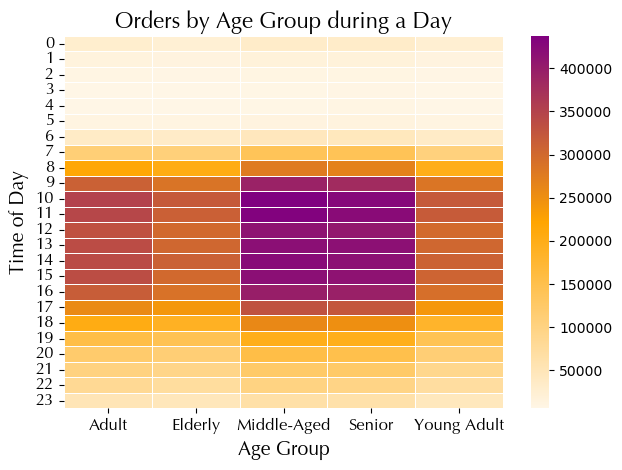

In [268]:
# Define custom colormap
colors = ['#fff6e6', '#ffa500', '#800080']  # light orange, orange, purple
n_bins = 500  # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the heatmap
heat_time_age = sns.heatmap(crosstab_fam_stat_time, cmap=custom_cmap, annot=False, annot_kws={'size': 10, 'fontfamily': 'Optima'}, fmt='d', linewidths=0.5)

# Set title and labels
plt.title('Orders by Age Group during a Day', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Age Group', fontname=fontname, fontsize=fontsize_label)  # Add x-axis label
plt.ylabel('Time of Day', fontname=fontname, fontsize=fontsize_label)  # Add y-axis label

# Get the color bar object from the heatmap
colorbar = heat_time_age.collections[0].colorbar

# Set the formatter of the color bar to ScalarFormatter with desired settings
colorbar.formatter.set_powerlimits((0, 0))
colorbar.formatter.set_scientific(False)

# Apply formatting for heatmaps
set_plot_settings('heat')


plt.show()

# Export bar chart
heat_time_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heat_time_age.png'), bbox_inches='tight')

**_______________________________________________________________________________________________________________**

#### <mark>Result</mark>

* The highest number or orders are between 9am to 4 pm.

* The most order place at this time period is done by **middle-aged and senior customers**, with overrall up to 400000 orders.

* The least group to order are Elderly and Young Adult.

* Although the order placed after 4 pm decreases untill 11 pm, the numbers are still higher than from midnight to 6 am. 


**_______________________________________________________________________________________________________________**

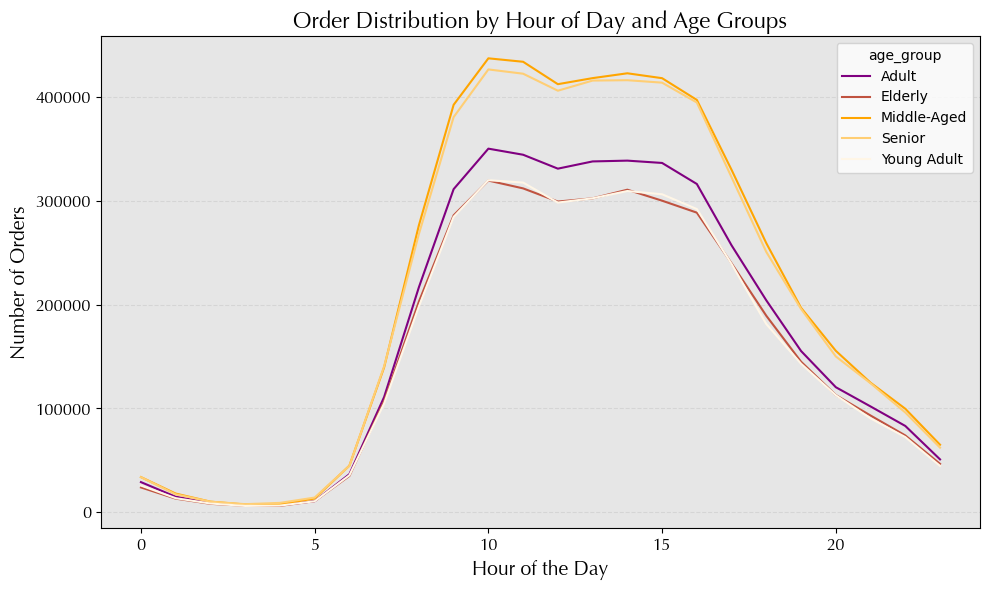

In [261]:
# Define custom colormap
colors = ['#800080', '#ffa500', '#fff6e6'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the line graph
line_cross_agegroup_hours = crosstab_fam_stat_time.plot(kind='line', figsize=(10, 6), cmap=custom_cmap)

# Set title and labels
plt.title('Order Distribution by Hour of Day and Age Groups', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('Hour of the Day', fontname=fontname, fontsize=fontsize_label)
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply common plot settings
set_plot_settings('vertical')

plt.show()

In [262]:
## Export File

# Export bar chart
line_cross_agegroup_hours.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_cross_agegroup_hours.png'), bbox_inches='tight')

## Time of Order and Family Status

In [264]:
# Create crosstab of 'demographic_profile' and 'order_day_of_week'
cross_demographic_days = pd.crosstab(big2['time_of_day'], big2['demographic_profile'], dropna=False)

cross_demographic_days

demographic_profile,AverageFamily,Childless_Adult,Childless_Senior,SeniorFamily,YoungFamily,Young_Parent,Young_Single
time_of_day,,,,,,,
0,52253,17825,11322,36836,13521,7470,6965
1,27465,9335,5964,19179,7404,3889,3468
2,15849,5263,4331,11237,4530,2437,2114
3,11625,4060,3122,8694,3335,1775,1477
4,11812,4165,2779,10179,3319,1966,1590
5,20073,6582,5456,15511,5509,3038,2942
6,68149,22892,16502,50458,18134,10508,10089
7,208977,70822,54189,154791,55904,29626,28786
8,409203,138731,99898,298672,109890,53061,52926


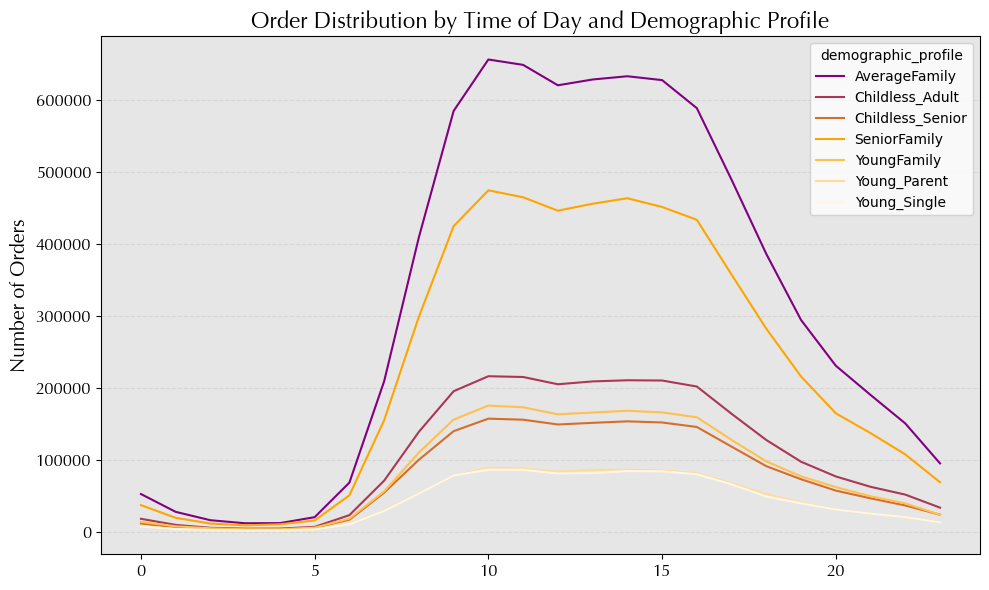

In [269]:
# Define custom colormap
colors = ['#800080', '#ffa500', '#fff6e6'] # light orange, orange, purple
n_bins = 500 # Discretization of the colormap
cmap_name = 'colormap_orange'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the line graph
line_cross_demographic_time = cross_demographic_days.plot(kind='line', figsize=(10, 6), cmap=custom_cmap)

# Set title and labels
plt.title('Order Distribution by Time of Day and Demographic Profile', fontname=fontname, fontsize=fontsize_title)
plt.xlabel('') # Remove x-axis label
plt.ylabel('Number of Orders', fontname=fontname, fontsize=fontsize_label)

# Apply common plot settings
set_plot_settings('vertical')


plt.show()

In [270]:

# Export bar chart
line_cross_demographic_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_cross_demographic_time.png'), bbox_inches='tight')

##### Result####

For all Demographic profile, the main time of the day to use instacart is from around 9am to 4pm.

between Midnight and 5 am are the least order placed, even lesser than btween 8pm and midnight.
* The most orders placed during 9am and 4pm are placed by the AverageFamily, ,followed by SeniorFamily. 
* The remaining Demographich profiles display similar in order numbers, this goes for ChildlessAdult, Childles, sENIORS, yOUNG Families.
* Young Singles display the least amount of order among all profiles.

Overall, the busiest hours is between 9 or 10 am until 5pm, with AverageFamily and Senior Family being the biggest consumer of instacart.

# 15. Export file

In [272]:
big2.shape

(21676096, 38)

In [273]:
big2.to_pickle(os.path.join(path,'02 Data','Prepared Data','4.10_Ords_depart_cust_merged_sample_final'))

In [284]:
df2.shape

(30964564, 32)

In [285]:
df.shape

(32404859, 32)